In [1]:
# Load Library

packages <- c("dplyr", "haven","ggplot2")

install_if_missing <- function(pkg) {
  if (!requireNamespace(pkg, quietly = TRUE)) {
    install.packages(pkg)
  }
  library(pkg, character.only = TRUE)
}

lapply(packages, install_if_missing)

#test



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




[[1]]
[1] "dplyr"     "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[2]]
[1] "haven"     "dplyr"     "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[3]]
 [1] "ggplot2"   "haven"     "dplyr"     "stats"     "graphics"  "grDevices"
 [7] "utils"     "datasets"  "methods"   "base"

# Read Data

## Selected Variables

In [2]:
var9902 <- readLines("Data/var9902.txt") # Selected Variable for Diet
length(var9902)
var0304 <- readLines("Data/var0304.txt") # Selected Variable for Diet
length(var0304)
var0520 <- readLines("Data/var0520.txt") # Selected Variable for Diet
length(var0520)

var_nhanes <- readLines("Data/Nhanes_Variables.txt") # Selected Variable for Nhanes
length(var_nhanes)

Warning message in readLines("Data/var9902.txt"):
"incomplete final line found on 'Data/var9902.txt'"


[1] 46

Warning message in readLines("Data/var0304.txt"):
"incomplete final line found on 'Data/var0304.txt'"


[1] 46

Warning message in readLines("Data/var0520.txt"):
"incomplete final line found on 'Data/var0520.txt'"


[1] 46

Warning message in readLines("Data/Nhanes_Variables.txt"):
"incomplete final line found on 'Data/Nhanes_Variables.txt'"


[1] 12

## Read Nhanes Data

In [3]:
nahnes <- read.csv("Data/nhanes_data.csv") %>% 
    select(all_of(var_nhanes))
head(nahnes)

,svy_id,svy_year,demo_age_cat,demo_race,demo_race_black,demo_age_years,demo_pregnant,demo_gender,bp_sys_mean,bp_dia_mean,cc_bmi,htn_aware
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,12,1999-2000,18 to 44,Non-Hispanic White,No,37,No,Men,176.6667,102.00000,30 to <35,Yes
2,21,1999-2000,18 to 44,Hispanic,No,18,No,Men,121.3333,80.00000,35+,No
3,27,1999-2000,18 to 44,Hispanic,No,18,No,Men,118.0000,78.00000,25 to <30,No
4,28,1999-2000,18 to 44,Non-Hispanic White,No,18,No,Men,94.0000,42.66667,<25,No
5,56,1999-2000,18 to 44,Non-Hispanic White,No,21,No,Men,121.0000,65.00000,<25,No
6,57,1999-2000,18 to 44,Non-Hispanic White,No,39,No,Men,119.3333,85.33333,25 to <30,Yes


## Read DT1TOT Data

In [4]:
# DR1TOT
tot <- data.frame() 

## DR1TOT_A Have different water variable name, rename it
tot_a <- read_xpt("Data/DR1TOT_A.xpt")
names(tot_a)[names(tot_a) == "DRXTWATE"] <- "DRXTMOIS"
tot_a <- tot_a  %>% 
    select(all_of(var9902))

tot <- rbind(tot, tot_a)


## DR1TOT_B
tot_b <- read_xpt("Data/DR1TOT_B.xpt")
tot_b <- tot_b  %>% 
    select(all_of(var9902))

tot <- rbind(tot, tot_b)


## DR1TOT_C
tot_c <- read_xpt("Data/DR1TOT_C.xpt")
tot_c <- tot_c  %>% 
    select(all_of(var0304))
names(tot_c) <- var9902 # Same Vairbale Name

tot <- rbind(tot, tot_c)


## DR1TOT_D to DR1TOT_J
files <- paste0("Data/DR1TOT_", LETTERS[4:10], ".xpt")  

for (file in files) {
    temp <- read_xpt(file) %>%
        select(all_of(var0520))
    
    names(temp) <- var9902  #Same Vairbale Name
    
    tot <- rbind(tot, temp) 
}

# View Data
head(tot)
tail(tot)

SEQN,DRXTPROT,DRXTCARB,DRXTTFAT,DRXTSFAT,DRXTMFAT,DRXTPFAT,DRXTCHOL,DRXTFIBE,DRXTVB6,⋯,DRXTM201,DRXTM221,DRXTP182,DRXTP183,DRXTP184,DRXTP204,DRXTP205,DRXTP225,DRXTP226,DRD320GW
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,31.96,250.36,27.24,9.40,9.00,6.40,46.55,7.41,1.43,⋯,0.03,0.00,6.07,0.27,0,0.03,0.00,0.00,0.00,243.38
2,123.16,350.37,71.95,24.34,26.48,11.94,313.95,36.99,2.90,⋯,0.09,0.02,10.07,1.14,0,0.26,0.00,0.01,0.02,0.00
3,40.19,233.63,49.94,15.61,19.57,11.84,86.22,11.16,1.37,⋯,0.16,0.00,11.12,0.55,0,0.07,0.01,0.02,0.03,531.00
4,56.16,191.03,56.20,27.54,20.13,4.67,194.78,5.45,0.95,⋯,0.05,0.14,3.96,0.66,0,0.05,0.00,0.00,0.00,1652.00
5,97.13,253.98,114.52,36.00,60.55,11.35,180.57,17.28,2.92,⋯,0.18,0.00,10.03,1.25,0,0.07,0.00,0.01,0.01,1298.00
6,24.63,202.11,25.15,7.78,7.84,7.15,38.45,6.24,0.97,⋯,0.05,0.01,6.41,0.69,0,0.03,0.00,0.00,0.00,1711.00


SEQN,DRXTPROT,DRXTCARB,DRXTTFAT,DRXTSFAT,DRXTMFAT,DRXTPFAT,DRXTCHOL,DRXTFIBE,DRXTVB6,⋯,DRXTM201,DRXTM221,DRXTP182,DRXTP183,DRXTP184,DRXTP204,DRXTP205,DRXTP225,DRXTP226,DRD320GW
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
124817,51.33,90.33,63.18,25.360,22.624,9.509,813,5.8,0.691,⋯,0.106,0.000,8.038,0.832,0.001,0.392,0.003,0.025,0.111,1521.0
124818,58.05,512.14,183.51,62.115,61.034,45.841,220,15.0,0.647,⋯,0.444,0.004,41.362,4.263,0.000,0.088,0.010,0.019,0.006,0.0
124819,67.43,197.26,77.71,32.515,24.228,10.880,175,8.3,1.421,⋯,0.164,0.001,9.937,0.981,0.002,0.070,0.007,0.018,0.003,225.0
124820,39.32,157.81,48.77,15.558,13.070,14.765,84,12.3,2.002,⋯,0.138,0.004,13.410,1.293,0.002,0.042,0.007,0.009,0.001,0.0
124821,138.10,110.59,76.03,15.733,30.469,20.797,484,6.7,1.688,⋯,0.546,0.020,17.314,1.944,0.009,0.309,0.124,0.090,0.350,1267.5
124822,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## Merge Nhanes and DT1TOT

In [5]:
merge_df <- merge(nahnes, tot, by.x = "svy_id", by.y = "SEQN")

head(merge_df)
tail(merge_df)

,svy_id,svy_year,demo_age_cat,demo_race,demo_race_black,demo_age_years,demo_pregnant,demo_gender,bp_sys_mean,bp_dia_mean,⋯,DRXTM201,DRXTM221,DRXTP182,DRXTP183,DRXTP184,DRXTP204,DRXTP205,DRXTP225,DRXTP226,DRD320GW
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,1999-2000,75+,Non-Hispanic White,No,77,No,Men,100.6667,56.66667,⋯,0.09,0.02,10.07,1.14,0.00,0.26,0.00,0.01,0.02,0
2,5,1999-2000,45 to 64,Non-Hispanic White,No,49,No,Men,122.0000,82.66667,⋯,0.18,0.00,10.03,1.25,0.00,0.07,0.00,0.01,0.01,1298
3,6,1999-2000,18 to 44,Other,No,19,No,Women,114.6667,68.00000,⋯,0.05,0.01,6.41,0.69,0.00,0.03,0.00,0.00,0.00,1711
4,7,1999-2000,45 to 64,Non-Hispanic Black,Yes,59,No,Women,125.3333,80.00000,⋯,0.08,0.01,15.31,2.23,0.06,0.13,0.15,0.03,0.20,236
5,10,1999-2000,18 to 44,Non-Hispanic Black,Yes,43,No,Men,145.3333,96.00000,⋯,0.20,0.01,12.73,2.06,0.00,0.28,0.00,0.00,0.00,1888
6,12,1999-2000,18 to 44,Non-Hispanic White,No,37,No,Men,176.6667,102.00000,⋯,0.31,0.33,35.46,3.46,0.00,0.49,0.01,0.00,0.09,3304


,svy_id,svy_year,demo_age_cat,demo_race,demo_race_black,demo_age_years,demo_pregnant,demo_gender,bp_sys_mean,bp_dia_mean,⋯,DRXTM201,DRXTM221,DRXTP182,DRXTP183,DRXTP184,DRXTP204,DRXTP205,DRXTP225,DRXTP226,DRD320GW
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
59794,124814,2017-2020,45 to 64,Non-Hispanic Black,Yes,64,No,Men,140.1667,85.36667,⋯,0.211,0.008,16.079,1.911,0.000,0.085,0.005,0.009,0.005,1014.0
59795,124815,2017-2020,45 to 64,Non-Hispanic Black,Yes,52,No,Men,141.5000,85.36667,⋯,0.403,0.066,13.748,1.040,0.106,0.455,0.008,0.030,0.093,2028.0
59796,124817,2017-2020,65 to 74,Hispanic,No,67,No,Women,113.5000,66.03333,⋯,0.106,0.000,8.038,0.832,0.001,0.392,0.003,0.025,0.111,1521.0
59797,124818,2017-2020,18 to 44,Non-Hispanic Black,Yes,40,No,Men,104.5000,66.03333,⋯,0.444,0.004,41.362,4.263,0.000,0.088,0.010,0.019,0.006,0.0
59798,124821,2017-2020,45 to 64,Non-Hispanic Black,Yes,63,No,Men,125.5000,65.36667,⋯,0.546,0.020,17.314,1.944,0.009,0.309,0.124,0.090,0.350,1267.5
59799,124822,2017-2020,65 to 74,Hispanic,No,74,No,Men,123.5000,55.03333,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## cleaning the data

In [6]:
##' exclude pregnant women and missing responses on bp
merge_df <- merge_df %>% 
  filter(demo_pregnant == "No") %>% 
  filter(!is.na(bp_sys_mean) & !is.na(bp_dia_mean))

Tried locally that most missing values are missing together as an observation for all year cycle. Specifically, those variables missing together are the ones that represent types of fatty acids. `cc_bmi` and `DRD320GW` have missing indexes partially overlapping with the acids.
And no variable is missing more than 10% of the total sample size of the year cycle. So the complete merged data set can be imputed using the union of indexes of all year cycles.

In [7]:
# together:
ms_idx<- lapply(names(merge_df), function(col) which(is.na(merge_df[[col]])))
names(ms_idx) <- names(merge_df)
ms_idx_len <- lapply(ms_idx, length)

# delete the union of the indexes
mid_u <- union(ms_idx$DRD320GW, ms_idx$DRXTP226)
union_idx <- union(ms_idx$cc_bmi, mid_u)
merge_df_cln <- merge_df[-union_idx,]
# check: get the missing value indexes again
ms_idx_cln <- lapply(names(merge_df_cln), function(col) which(is.na(merge_df_cln[[col]])))
names(ms_idx_cln) <- names(merge_df_cln)
ms_idx_cln_len <- lapply(ms_idx_cln, length)

In [8]:
# print the length of missing values for each variable
print(ms_idx_cln_len > 0)

         svy_id        svy_year    demo_age_cat       demo_race demo_race_black 
          FALSE           FALSE           FALSE           FALSE           FALSE 
 demo_age_years   demo_pregnant     demo_gender     bp_sys_mean     bp_dia_mean 
          FALSE           FALSE           FALSE           FALSE           FALSE 
         cc_bmi       htn_aware        DRXTPROT        DRXTCARB        DRXTTFAT 
          FALSE            TRUE           FALSE           FALSE           FALSE 
       DRXTSFAT        DRXTMFAT        DRXTPFAT        DRXTCHOL        DRXTFIBE 
          FALSE           FALSE           FALSE           FALSE           FALSE 
        DRXTVB6        DRXTVB12        DRXTFOLA          DRXTVC        DRXTCALC 
          FALSE           FALSE           FALSE           FALSE           FALSE 
       DRXTPHOS        DRXTMAGN        DRXTIRON        DRXTZINC        DRXTCOPP 
          FALSE           FALSE           FALSE           FALSE           FALSE 
       DRDTSODI        DRXTP

In [9]:
# write.csv(merge_df_cln, "Data/merge_df_cln.csv")

# EDA and univariate analysis

In [10]:
summary(merge_df_cln)

     svy_id         svy_year         demo_age_cat        demo_race        
 Min.   :     2   Length:50563       Length:50563       Length:50563      
 1st Qu.: 30064   Class :character   Class :character   Class :character  
 Median : 56211   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 58259                                                           
 3rd Qu.: 82919                                                           
 Max.   :124821                                                           
 demo_race_black    demo_age_years  demo_pregnant      demo_gender       
 Length:50563       Min.   :18.00   Length:50563       Length:50563      
 Class :character   1st Qu.:31.00   Class :character   Class :character  
 Mode  :character   Median :47.00   Mode  :character   Mode  :character  
                    Mean   :47.75                                        
                    3rd Qu.:63.00                                        
                    Max.   :80.

In [11]:
# define a function that calculate summary statistics for numerical variables and levels for characteristics ones
# returns a list `statistic` that contains the results and
# returns a modified data set that converted the characteristics to factors
calculate_stats <- function(data) {
  # Load necessary packages
  if (!requireNamespace("dplyr", quietly = TRUE)) install.packages("dplyr")
  if (!requireNamespace("modeest", quietly = TRUE)) install.packages("modeest")

  library(dplyr)
  library(modeest)

  # Initialize an empty list to store results
  results <- list()
  
  # Iterate through each column
  for (col_name in colnames(data)) {
    column <- data[[col_name]]
    
    if (is.numeric(column)) {
      # Calculate mean, median, mode, and standard deviation
      mean_value <- mean(column)
      median_value <- median(column)
      min_value <- min(column)
      max_value <- max(column)
      #mode_value <- as.numeric(mlv(na.omit(column), method = "mfv"))
      sd_value <- sd(column)
      
      # Store results in a sublist
      results[[col_name]] <- list(
        type = "numeric",
        mean = mean_value,
        median = median_value,
        minimum = min_value,
          maximum = max_value,
        #mode = mode_value,
        std_dev = sd_value
      )
      
    } else {
      # Convert character columns to factors
      data[[col_name]] <- as.factor(column)
      
      # Calculate frequency table for categorical variables
      freq_table <- table(data[[col_name]])
      
      # Store results in a sublist
      results[[col_name]] <- list(
        type = "categorical",
        frequencies = as.list(freq_table)
      )
    }
  }
  
  # Return both the computed statistics and the modified dataset
  return(list(statistics = results, modified_data = data))
}

In [12]:
# leave the survey id (svy_id) out
result <- calculate_stats(merge_df_cln[,-c(1)])

In [13]:
result$statistics

$svy_year
$svy_year$type
[1] "categorical"

$svy_year$frequencies
$svy_year$frequencies$`1999-2000`
[1] 4208

$svy_year$frequencies$`2001-2002`
[1] 4532

$svy_year$frequencies$`2003-2004`
[1] 4352

$svy_year$frequencies$`2005-2006`
[1] 4419

$svy_year$frequencies$`2007-2008`
[1] 5325

$svy_year$frequencies$`2009-2010`
[1] 5686

$svy_year$frequencies$`2011-2012`
[1] 4750

$svy_year$frequencies$`2013-2014`
[1] 5037

$svy_year$frequencies$`2015-2016`
[1] 4978

$svy_year$frequencies$`2017-2020`
[1] 7276



$demo_age_cat
$demo_age_cat$type
[1] "categorical"

$demo_age_cat$frequencies
$demo_age_cat$frequencies$`18 to 44`
[1] 22945

$demo_age_cat$frequencies$`45 to 64`
[1] 16029

$demo_age_cat$frequencies$`65 to 74`
[1] 6508

$demo_age_cat$frequencies$`75+`
[1] 5081



$demo_race
$demo_race$type
[1] "categorical"

$demo_race$frequencies
$demo_race$frequencies$Hispanic
[1] 13115

$demo_race$frequencies$`Non-Hispanic Asian`
[1] 2413

$demo_race$frequencies$`Non-Hispanic Black`
[1] 11069

$demo_race$frequencies$`Non-Hispanic White`
[1] 22010

$demo_race$frequencies$Other
[1] 1956



$demo_race_black
$demo_race_black$type
[1] "categorical"

$demo_race_black$frequencies
$demo_race_black$frequencies$No
[1] 39494

$demo_race_black$frequencies$Yes
[1] 11069



$demo_age_years
$demo_age_years$type
[1] "numeric"

$demo_age_years$mean
[1] 47.75019

$demo_age_years$median
[1] 47

$demo_age_years$minimum
[1] 18

$demo_age_years$maximum
[1] 80

$demo_age_years$std_dev
[1] 18.87903


$demo_pregnant
$demo_pregnant$type
[1] "categorical"

$demo_pregnant$frequencies
$demo_pregnant$frequencies$No
[1] 50563



$demo_gender
$demo_gender$type
[1] "categorical"

$demo_gender$frequencies
$demo_gender$frequencies$Men
[1] 25516

$demo_gender$frequencies$Women
[1] 25047



$bp_sys_mean
$bp_sys_mean$type
[1] "numeric"

$bp_sys_mean$mean
[1] 124.3648

$bp_sys_mean$median
[1] 121.1667

$bp_sys_mean$minimum
[1] 64.66667

$bp_sys_mean$maximum
[1] 270

$bp_sys_mean$std_dev
[1] 19.07071


$bp_dia_mean
$bp_dia_mean$type
[1] "numeric"

$bp_dia_mean$mean
[1] 70.68495

$bp_dia_mean$median
[1] 70.66667

$bp_dia_mean$minimum
[1] 8

$bp_dia_mean$maximum
[1] 133.7

$bp_dia_mean$std_dev
[1] 11.90995


$cc_bmi
$cc_bmi$type
[1] "categorical"

$cc_bmi$frequencies
$cc_bmi$frequencies$`<25`
[1] 15796

$cc_bmi$frequencies$`25 to <30`
[1] 16620

$cc_bmi$frequencies$`30 to <35`
[1] 10120

$cc_bmi$frequencies$`35+`
[1] 8027



$htn_aware
$htn_aware$type
[1] "categorical"

$htn_aware$frequencies
$htn_aware$frequencies$No
[1] 33525

$htn_aware$frequencies$Yes
[1] 16824



$DRXTPROT
$DRXTPROT$type
[1] "numeric"

$DRXTPROT$mean
[1] 80.79348

$DRXTPROT$median
[1] 72.95

$DRXTPROT$minimum
[1] 0

$DRXTPROT$maximum
[1] 718.42

$DRXTPROT$std_dev
[1] 43.31412


$DRXTCARB
$DRXTCARB$type
[1] "numeric"

$DRXTCARB$mean
[1] 258.2434

$DRXTCARB$median
[1] 235.35

$DRXTCARB$minimum
[1] 0

$DRXTCARB$maximum
[1] 1815.02

$DRXTCARB$std_dev
[1] 131.0796


$DRXTTFAT
$DRXTTFAT$type
[1] "numeric"

$DRXTTFAT$mean
[1] 80.84467

$DRXTTFAT$median
[1] 71.85

$DRXTTFAT$minimum
[1] 0

$DRXTTFAT$maximum
[1] 839.65

$DRXTTFAT$std_dev
[1] 47.42065


$DRXTSFAT
$DRXTSFAT$type
[1] "numeric"

$DRXTSFAT$mean
[1] 26.2037

$DRXTSFAT$median
[1] 22.633

$DRXTSFAT$minimum
[1] 0

$DRXTSFAT$maximum
[1] 268.591

$DRXTSFAT$std_dev
[1] 16.95308


$DRXTMFAT
$DRXTMFAT$type
[1] "numeric"

$DRXTMFAT$mean
[1] 29.26117

$DRXTMFAT$median
[1] 25.655

$DRXTMFAT$minimum
[1] 0

$DRXTMFAT$maximum
[1] 339.932

$DRXTMFAT$std_dev
[1] 18.15123


$DRXTPFAT
$DRXTPFAT$type
[1] "numeric"

$DRXTPFAT$mean
[1] 18.04031

$DRXTPFAT$median
[1] 15.3

$DRXTPFAT$minimum
[1] 0

$DRXTPFAT$maximum
[1] 218.701

$DRXTPFAT$std_dev
[1] 12.41565


$DRXTCHOL
$DRXTCHOL$type
[1] "numeric"

$DRXTCHOL$mean
[1] 296.7353

$DRXTCHOL$median
[1] 225

$DRXTCHOL$minimum
[1] 0

$DRXTCHOL$maximum
[1] 3092.7

$DRXTCHOL$std_dev
[1] 246.0828


$DRXTFIBE
$DRXTFIBE$type
[1] "numeric"

$DRXTFIBE$mean
[1] 16.22498

$DRXTFIBE$median
[1] 14

$DRXTFIBE$minimum
[1] 0

$DRXTFIBE$maximum
[1] 147

### some discussion:

By the mean-median relationship: most variables have a greater mean than median, indicating that the samples are positively skewed (tails at right). For response variables, (`bp_dia_mean`) diastolic pressure is almost symmetric and the `bp_sys_mean` (systolic pressure) is little right skewed. Both don't need transformation prior to fitting the model.

For other variables, the samples are balanced in gender, around 40% people are non-hispanic white, and about 20% are black (hispanic and non-hispanic). Up around 50% samples are between 18-44 years old.

And due to different scales of the data, standardization prior to fitting is necessary.

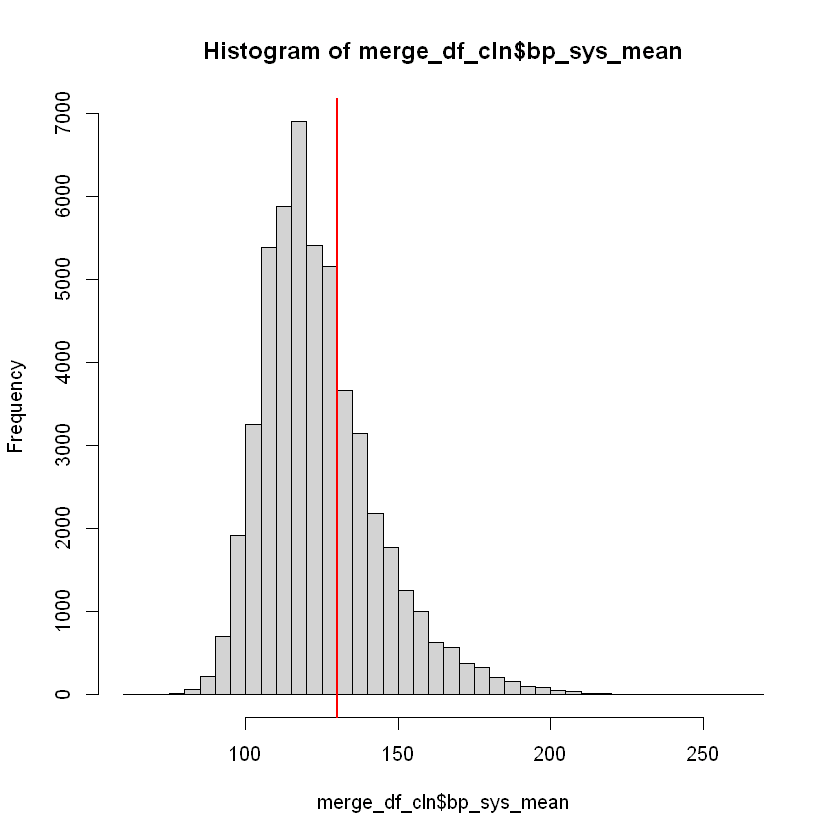

In [14]:
hist(merge_df_cln$bp_sys_mean, breaks=30)
abline(v=130, col="red", lwd=2)

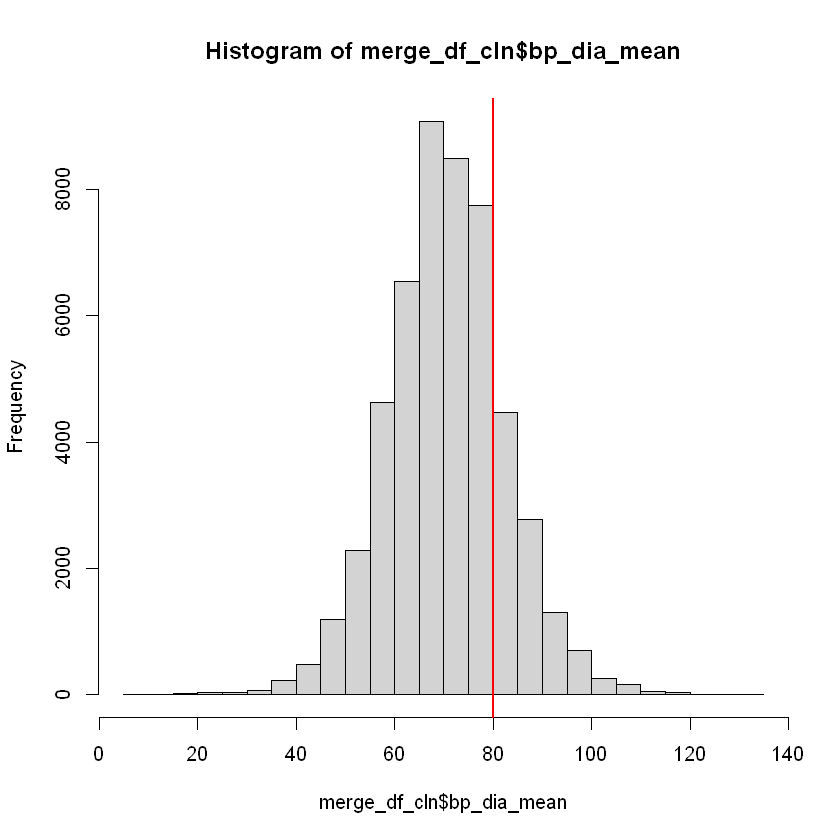

In [15]:
hist(merge_df_cln$bp_dia_mean, breaks=30)
abline(v=80, col="red", lwd=2)

### construct df1 and count the number of hypertension and non-hypertension

In [16]:
df1 <- merge_df_cln %>% 
        mutate(hyper = ifelse((bp_sys_mean >= 140 | bp_dia_mean >= 90), 1 , 0)) %>% 
        filter(htn_aware == "No") %>% #filter with Aware
        dplyr::select(-"bp_sys_mean", -"svy_id", -"bp_dia_mean", -"htn_aware")

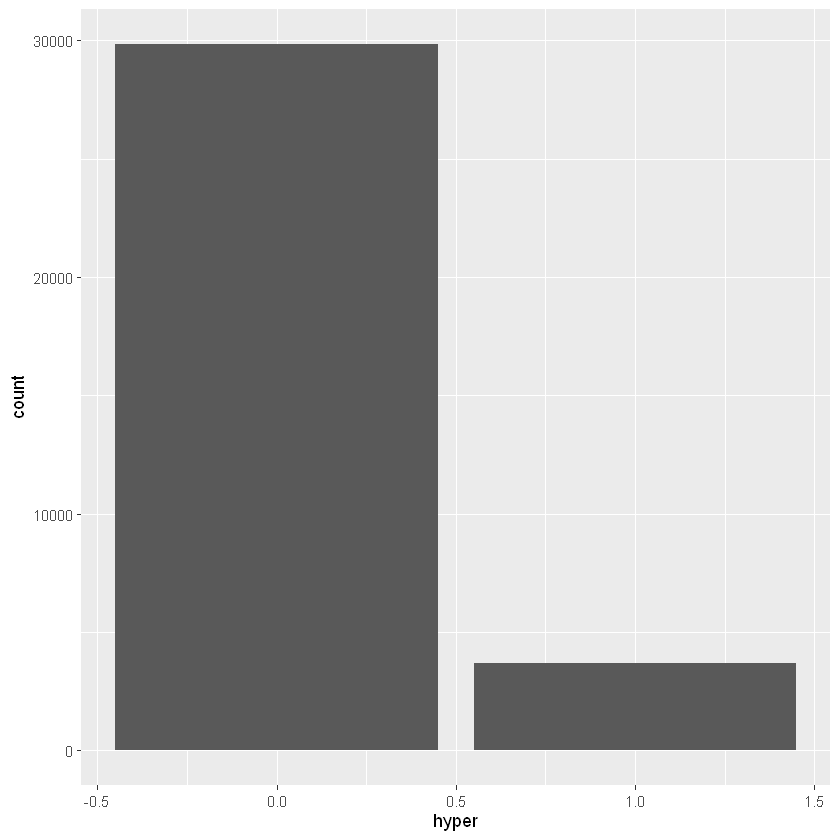

In [17]:
df1%>% 
    ggplot() +
    geom_bar(aes(x = hyper))

unbalanced response variable. Need to adjust the sampling before training.

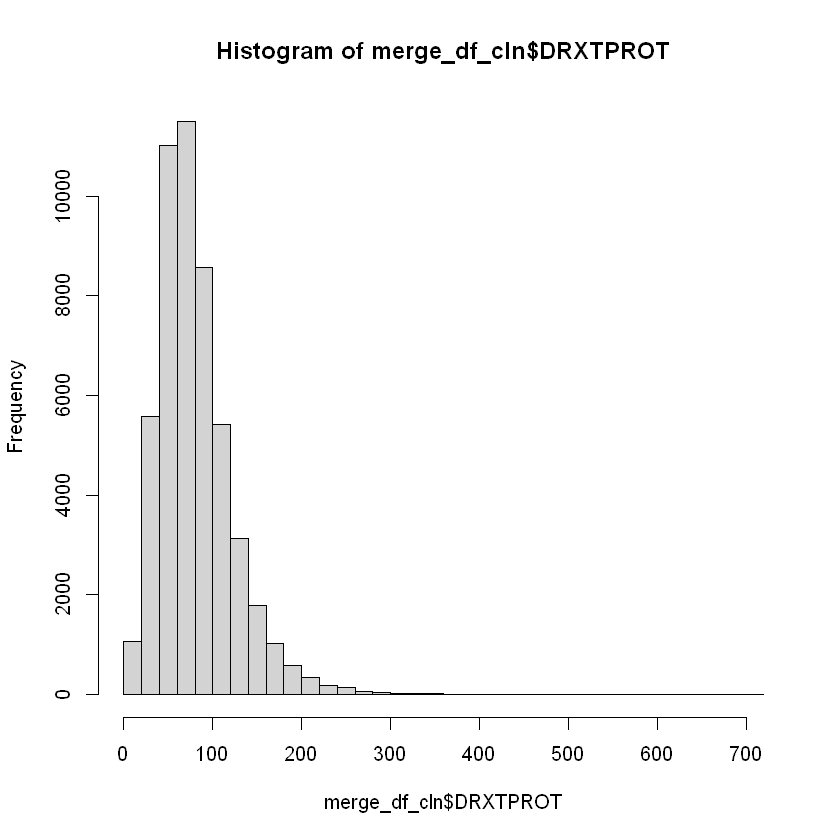

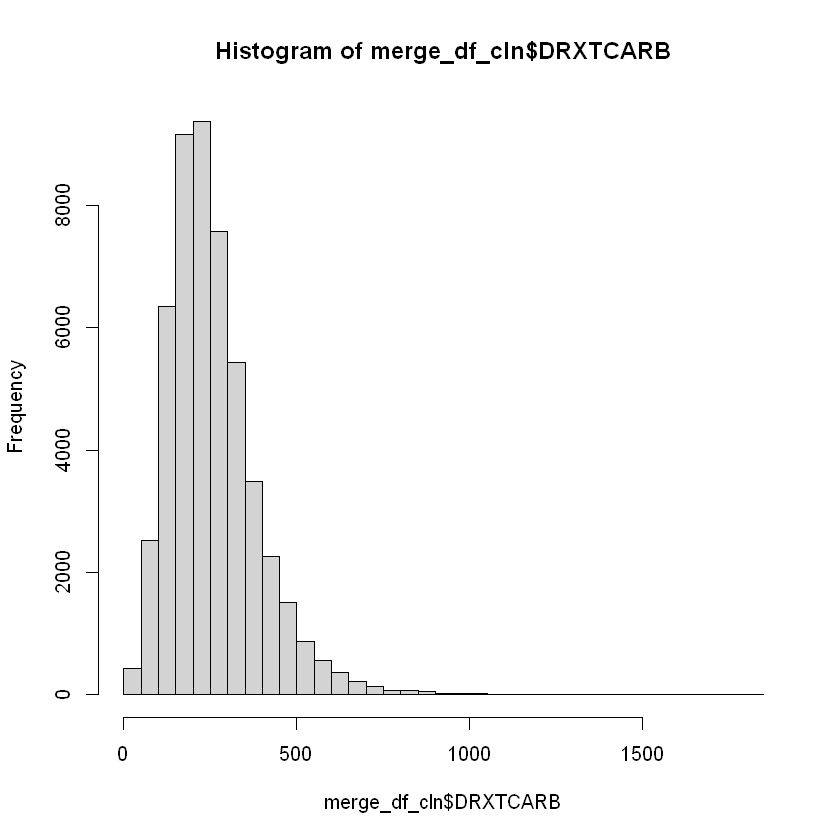

In [18]:
protein<- hist(merge_df_cln$DRXTPROT, breaks=30)
carbonhydrate<- hist(merge_df_cln$DRXTCARB, breaks=30)

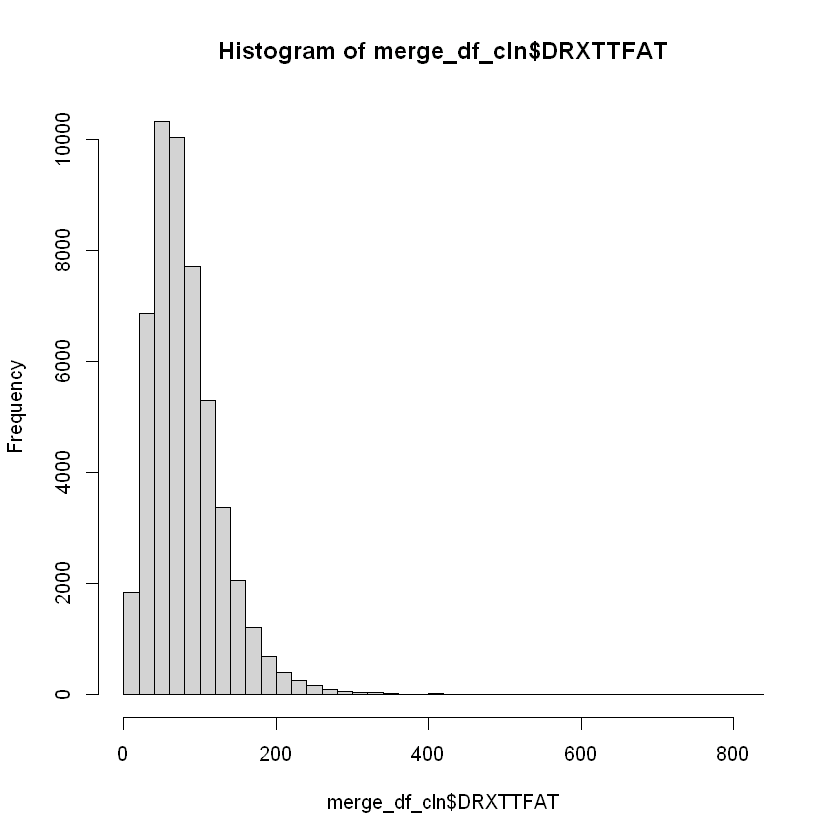

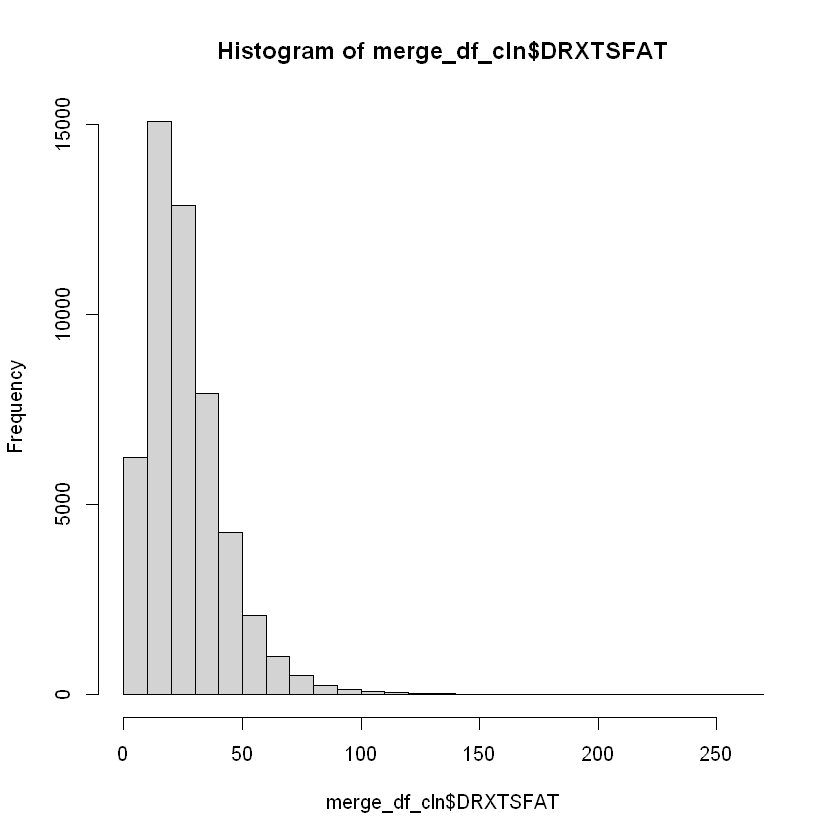

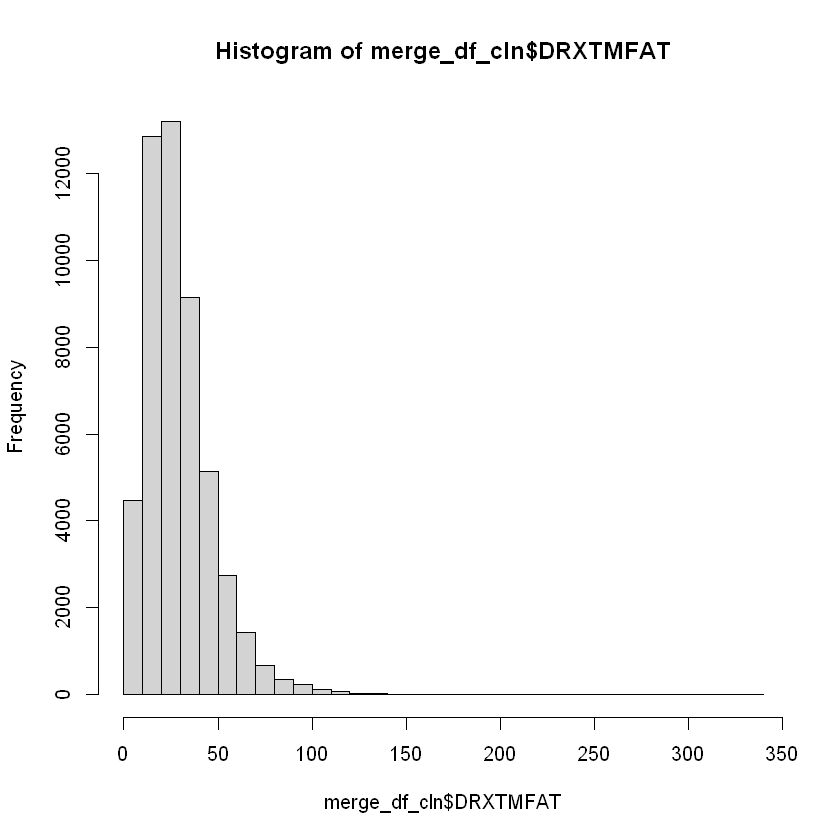

In [19]:
hist(merge_df_cln$DRXTTFAT, breaks=30)
hist(merge_df_cln$DRXTSFAT, breaks=30)
hist(merge_df_cln$DRXTMFAT, breaks=30)

### systolic pressure stratified by BMI


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




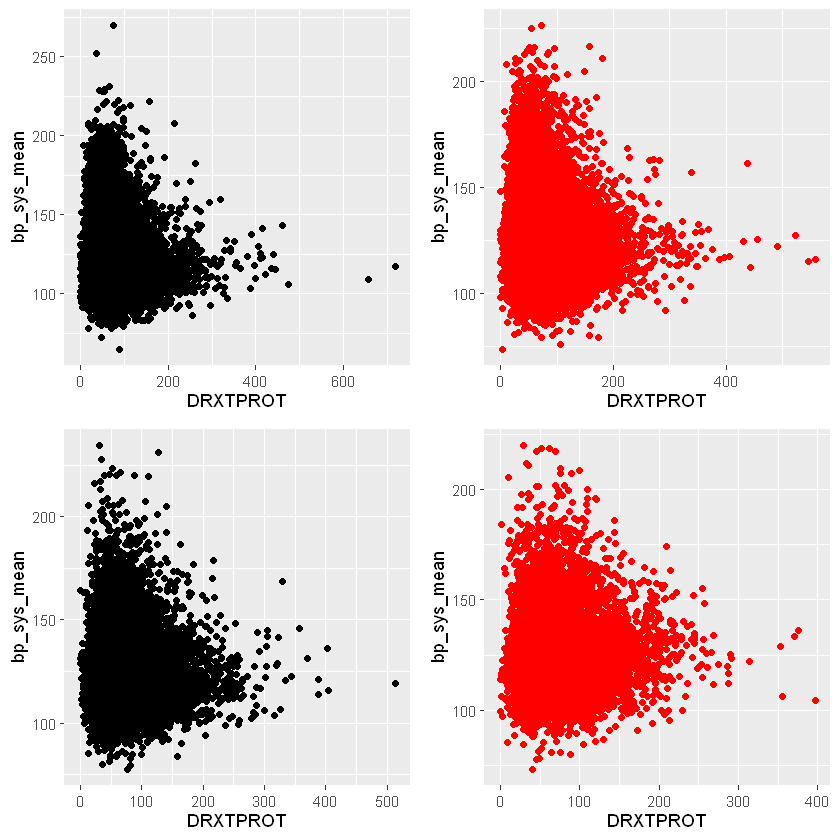

In [20]:
library(gridExtra)
p1 <- merge_df_cln %>%
    filter(cc_bmi == "<25") %>%
    ggplot(aes(x = DRXTPROT, y = bp_sys_mean)) + geom_point()
p2 <- merge_df_cln %>%
    filter(cc_bmi == "25 to <30") %>%
    ggplot(aes(x = DRXTPROT, y = bp_sys_mean)) + geom_point(color="red")
p3 <- merge_df_cln %>%
    filter(cc_bmi == "30 to <35") %>%
    ggplot(aes(x = DRXTPROT, y = bp_sys_mean)) + geom_point()

p4 <- merge_df_cln %>%
    filter(cc_bmi == "35+") %>%
    ggplot(aes(x = DRXTPROT, y = bp_sys_mean)) + geom_point(color="red")

# Arrange the plots in a 2x2 grid
grid.arrange(p1, p2, p3, p4, ncol = 2)

### diastolic pressure stratified by BMI

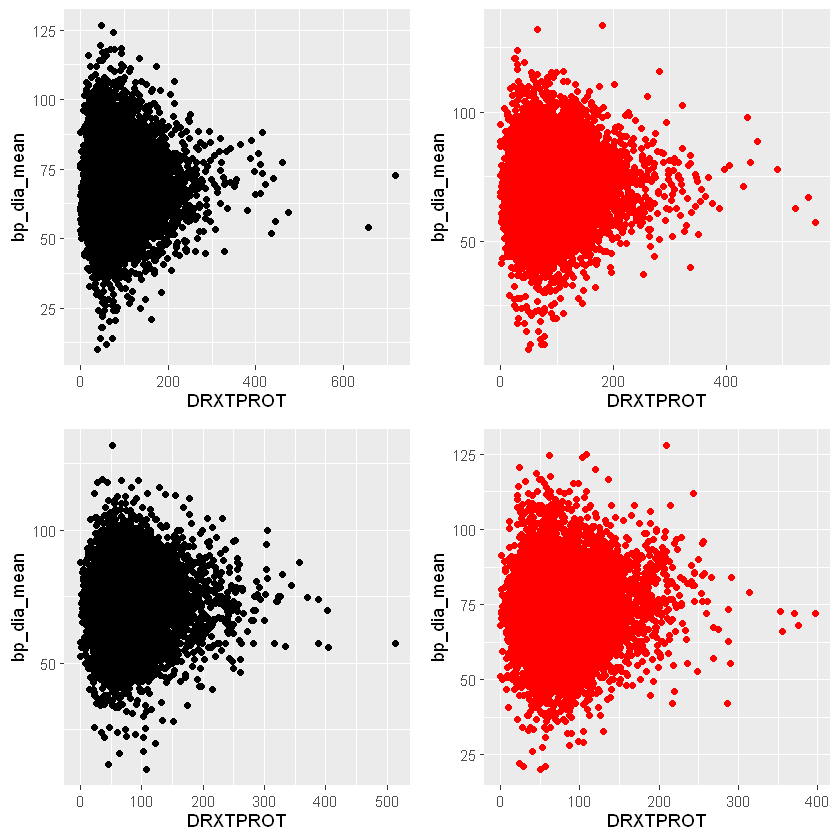

In [21]:
p1 <- merge_df_cln %>%
    filter(cc_bmi == "<25") %>%
    ggplot(aes(x = DRXTPROT, y = bp_dia_mean)) + geom_point()
p2 <- merge_df_cln %>%
    filter(cc_bmi == "25 to <30") %>%
    ggplot(aes(x = DRXTPROT, y = bp_dia_mean)) + geom_point(color="red")
p3 <- merge_df_cln %>%
    filter(cc_bmi == "30 to <35") %>%
    ggplot(aes(x = DRXTPROT, y = bp_dia_mean)) + geom_point()
p4 <- merge_df_cln %>%
    filter(cc_bmi == "35+") %>%
    ggplot(aes(x = DRXTPROT, y = bp_dia_mean)) + geom_point(color="red")
grid.arrange(p1, p2, p3, p4, ncol = 2)

### Responses stratified by gender

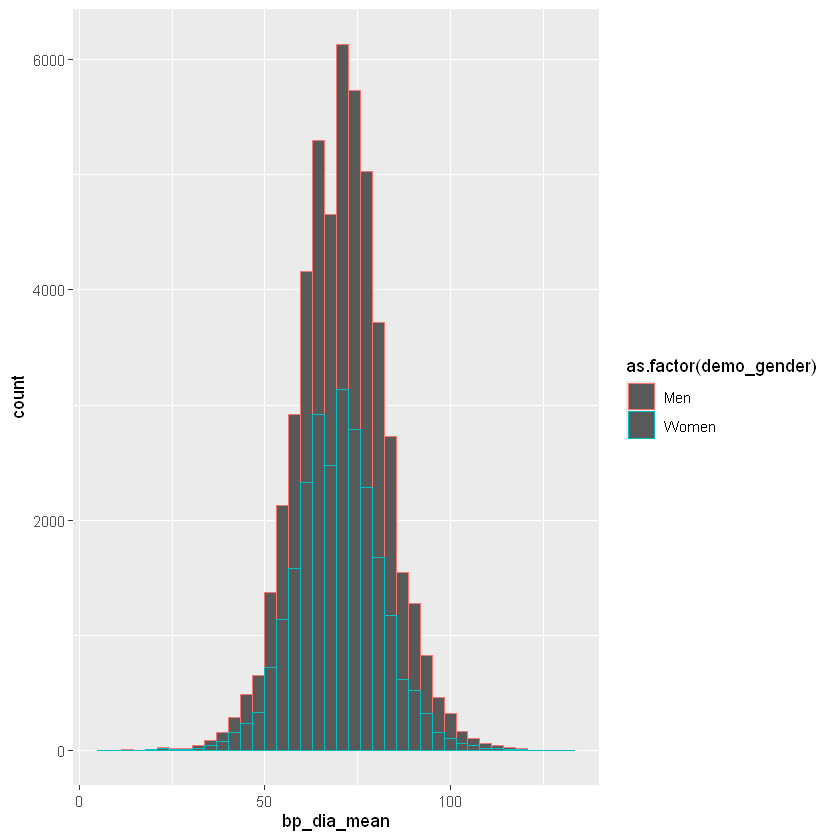

In [22]:
ggplot(data = merge_df_cln, mapping=aes(x= bp_dia_mean, color=as.factor(demo_gender))) + geom_histogram(bins = 40)

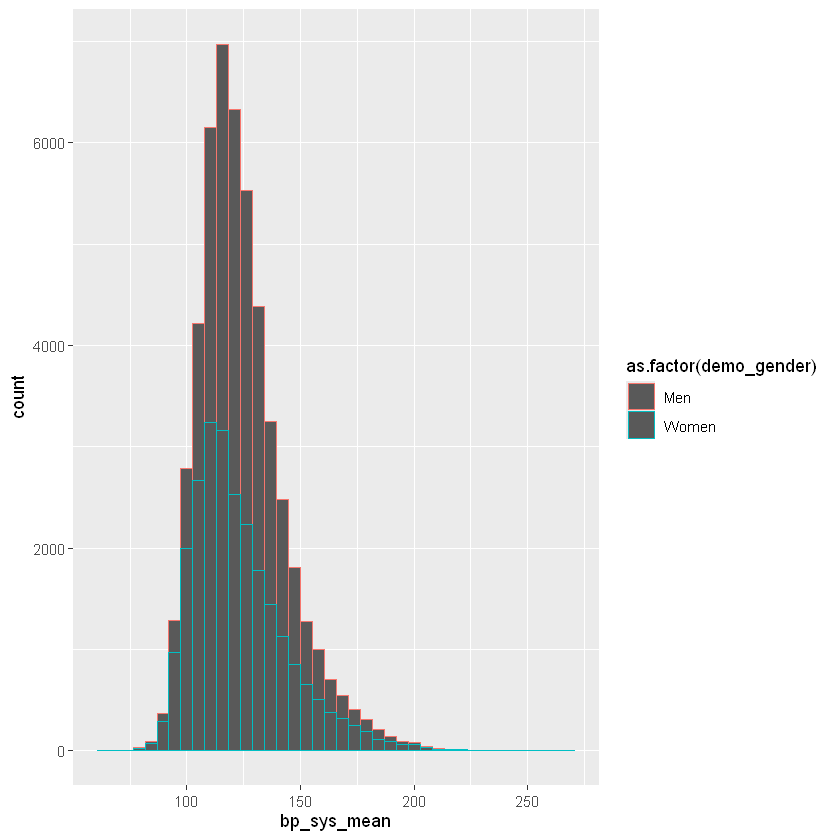

In [23]:
ggplot(data = merge_df_cln, mapping=aes(x= bp_sys_mean, color=as.factor(demo_gender))) + geom_histogram(bins = 40)

### responses stratified by age categories

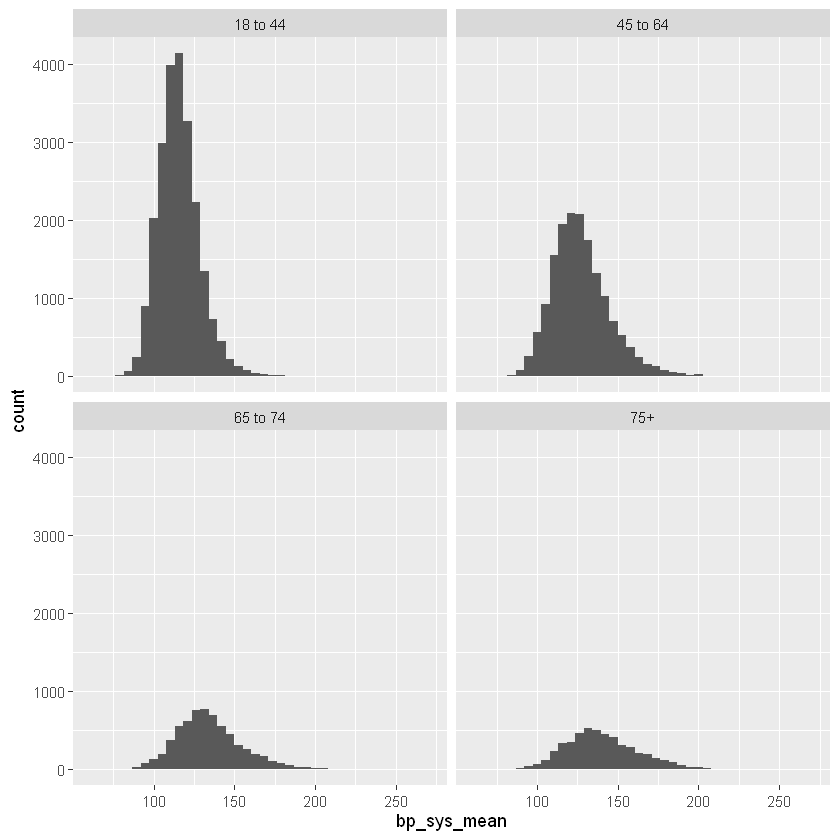

In [24]:
ggplot(data = merge_df_cln, mapping=aes(x= bp_sys_mean)) + geom_histogram(bins = 40) + facet_wrap("demo_age_cat")

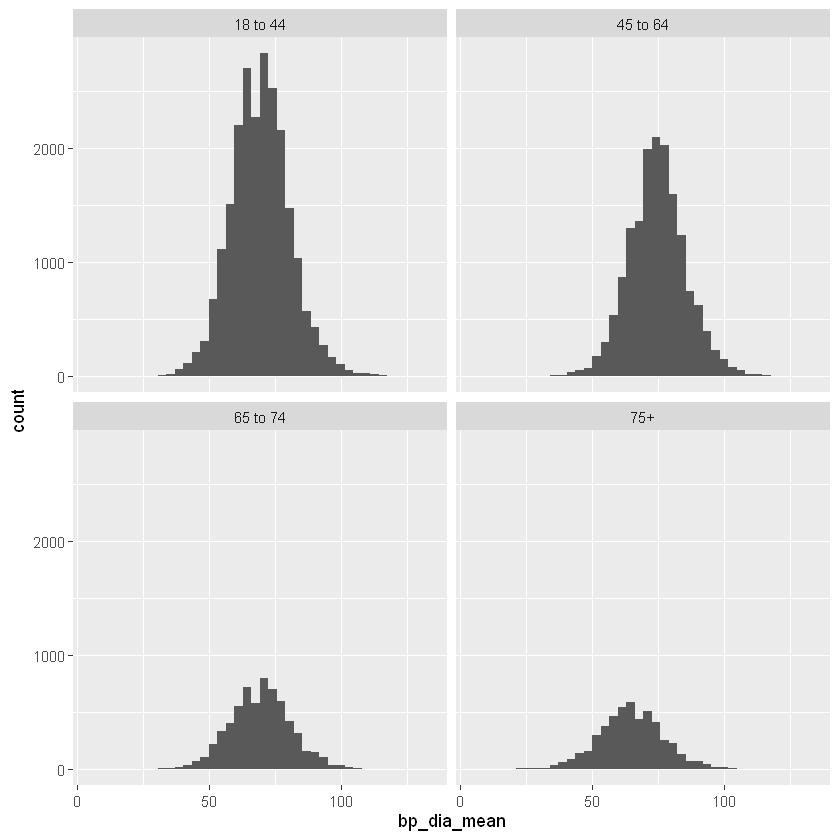

In [25]:
ggplot(data = merge_df_cln, mapping=aes(x= bp_dia_mean)) + geom_histogram(bins = 40) + facet_wrap("demo_age_cat")

### responses stratified by race

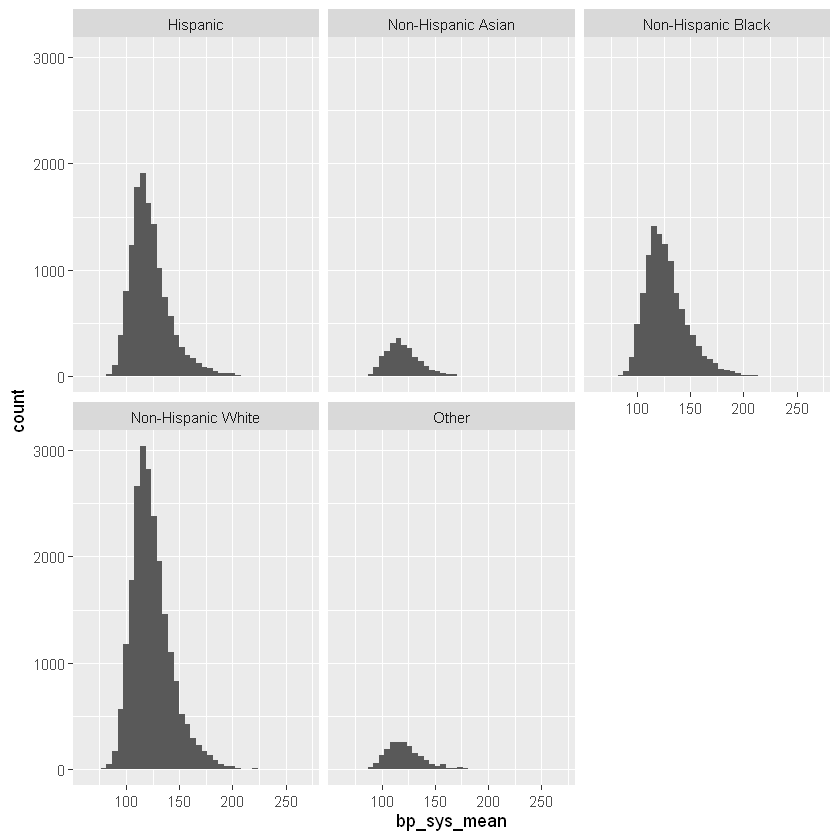

In [26]:
ggplot(data = merge_df_cln, mapping=aes(x= bp_sys_mean)) + geom_histogram(bins = 40) + facet_wrap("demo_race")

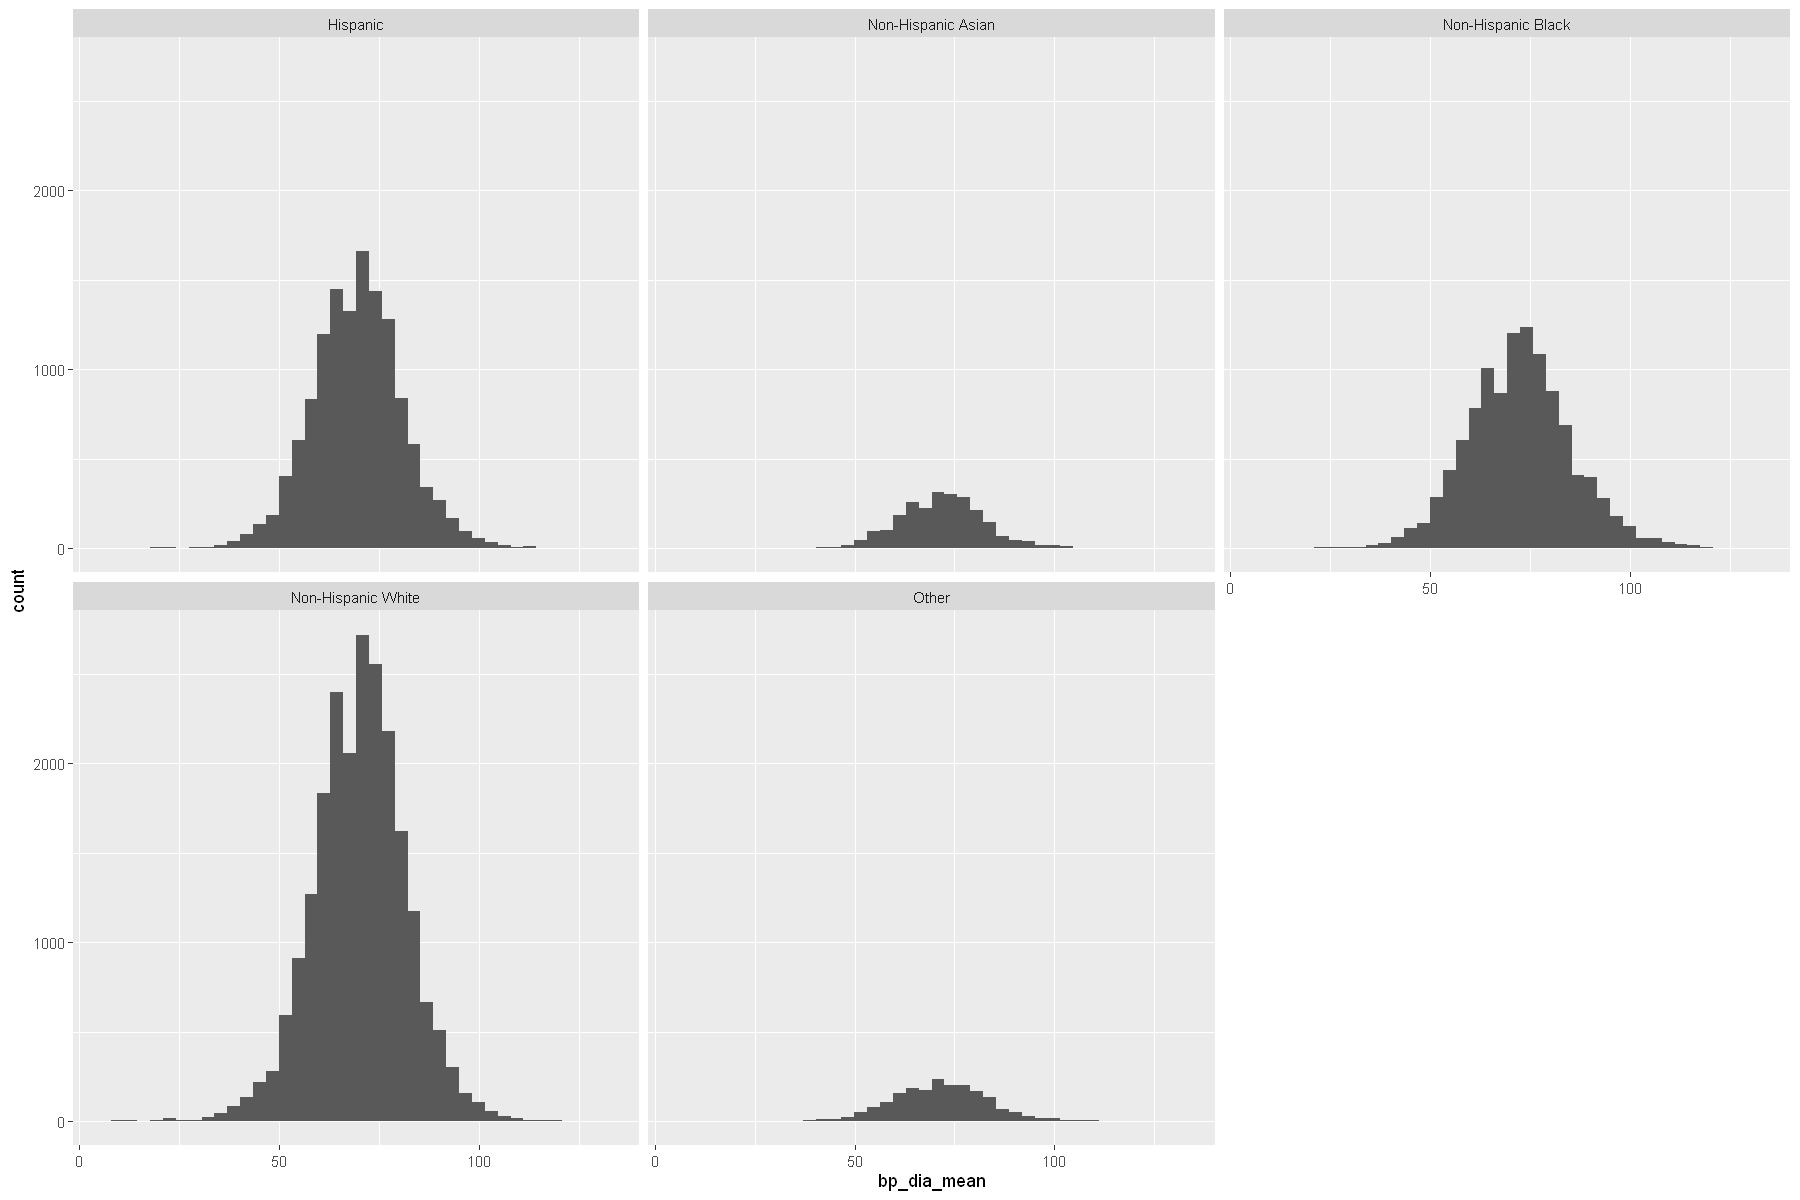

In [34]:
ggplot(data = merge_df_cln, mapping=aes(x= bp_dia_mean)) + geom_histogram(bins = 40) + facet_wrap("demo_race")

 plot hypertension counts by 140/90 and no awareness

# T Test Analysis

## Seprate by Year

In [33]:
subsets <- split(merge_df_cln, merge_df_cln$svy_year)

## T test for each variable 

In [40]:
# Define the ordered list of survey years
survey_years <- c("1999-2000", "2001-2002", "2003-2004", "2005-2006", "2007-2008", 
                  "2009-2010", "2011-2012", "2013-2014", "2015-2016", "2017-2020")

# Define the list of variables for t-tests
variables <- c("demo_age_years", "DRXTMOIS","DRXTCARB", "DRDTSODI", "DRXTCAFF", "DRXTFOLA", "DRXTVC", "DRXTCALC")

# Initialize an empty list to store t-test results
t_test_results <- list()

# Loop through all unique pairs of years and perform t-tests for each variable
for (i in 1:(length(survey_years) - 1)) {
  for (j in (i + 1):length(survey_years)) {
    year1 <- survey_years[i]
    year2 <- survey_years[j]
    
    # Extract subsets for each year
    df1 <- subsets[[year1]]
    df2 <- subsets[[year2]]
    
    # Loop through each variable and perform the t-test
    for (var in variables) {
      # Ensure the variable exists in both datasets before running the test
      if (var %in% names(df1) & var %in% names(df2)) {
        # Perform independent t-test on the variable
        t_test <- t.test(df1[[var]], df2[[var]], var.equal = FALSE)
        
        # Determine direction (Increase or Decrease)
        direction <- ifelse(t_test$statistic > 0, "Increase", "Decrease")
        
        # Check significance level (p < 0.05 → TRUE, else FALSE)
        significant <- t_test$p.value < 0.05
        
        # Store results
        t_test_results[[paste(year1, "vs", year2, "-", var)]] <- list(
          "Variable" = var,
          "Direction" = direction,
          "Significant" = significant
        )
      }
    }
  }
}

# Convert results to a data frame for better visualization
t_test_df <- do.call(rbind, lapply(names(t_test_results), function(x) {
  data.frame(Comparison = x, 
             Variable = t_test_results[[x]]$Variable, 
             Direction = t_test_results[[x]]$Direction, 
             Significant = t_test_results[[x]]$Significant)
}))

# Print the results
#print(t_test_df)


## EDA For Variable

In [30]:
# Define the list of survey years
survey_years <- c("1999-2000", "2001-2002", "2003-2004", "2005-2006", "2007-2008", 
                  "2009-2010", "2011-2012", "2013-2014", "2015-2016", "2017-2020")

# Define the list of variables for line plots
variables <- c("demo_age_years", "DRXTMOIS", "DRXTCARB", "DRDTSODI", 
               "DRXTCAFF", "DRXTFOLA", "DRXTVC", "DRXTCALC")

# Create an empty data frame to store mean values
mean_df <- data.frame(Survey_Year = rep(survey_years, each = length(variables)),
                      Variable = rep(variables, times = length(survey_years)),
                      Mean_Value = NA)

# Compute mean for each variable across survey years
for (year in survey_years) {
  df <- subsets[[year]]
  for (var in variables) {
    if (var %in% names(df)) {
      mean_value <- mean(df[[var]], na.rm = TRUE)
      mean_df$Mean_Value[mean_df$Survey_Year == year & mean_df$Variable == var] <- mean_value
    }
  }
}

# Convert survey years to factor with proper ordering
mean_df$Survey_Year <- factor(mean_df$Survey_Year, levels = survey_years)

# Initialize an empty list to store plots
plot_list <- list()

# Generate and store line plots for each variable
for (var in variables) {
  plot_data <- subset(mean_df, Variable == var)
  
  p <- ggplot(plot_data, aes(x = Survey_Year, y = Mean_Value, group = 1)) +
    geom_line(color = "blue") +
    geom_point(color = "red") +
    labs(title = paste("Mean", var, "Across Survey Years"),
         x = "Survey Year", 
         y = paste("Mean", var)) +
    theme_minimal() +
    theme(
        axis.text.x = element_text(size = 14, angle = 45, hjust = 1),
        axis.text.y = element_text(size = 14),
        axis.title.x = element_text(size = 16),  # X-axis title larger
        axis.title.y = element_text(size = 16),  # Y-axis title larger
        plot.title = element_text(size = 18, face = "bold")  # Title larger & bold
      )
  
  # Store the plot in the list with the variable name
  plot_list[[var]] <- p
}

# Plots are stored in plot_list, you can call and display them later


In [42]:
#mean_df

Survey_Year,Variable,Mean_Value
<fct>,<chr>,<dbl>
1999-2000,demo_age_years,47.36621
1999-2000,DRXTMOIS,1886.86448
1999-2000,DRXTCARB,263.00784
1999-2000,DRDTSODI,3251.90326
1999-2000,DRXTCAFF,170.73708
1999-2000,DRXTFOLA,364.20694
1999-2000,DRXTVC,103.82457
1999-2000,DRXTCALC,777.94301
2001-2002,demo_age_years,46.16505


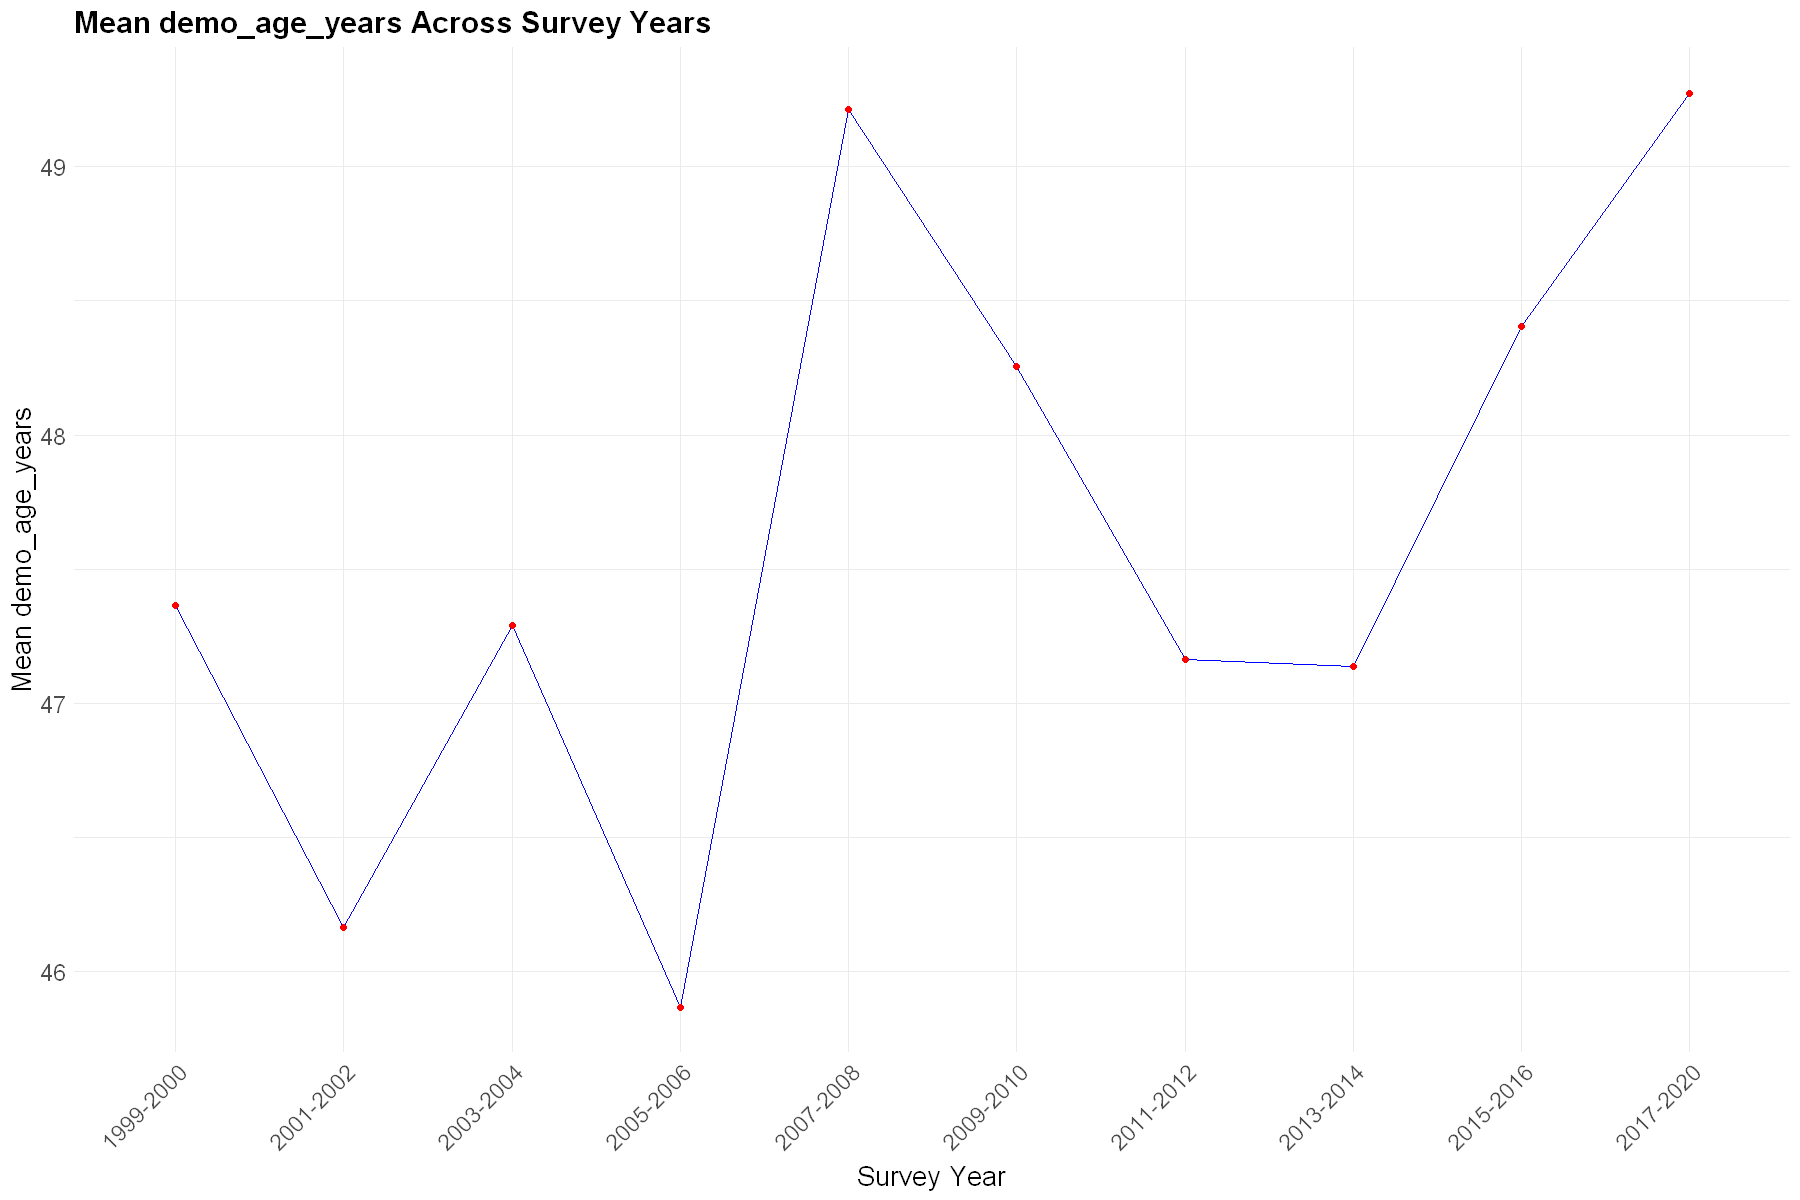

In [31]:
#options(repr.plot.width = 15, repr.plot.height = 10)
#plot_list[["demo_age_years"]]

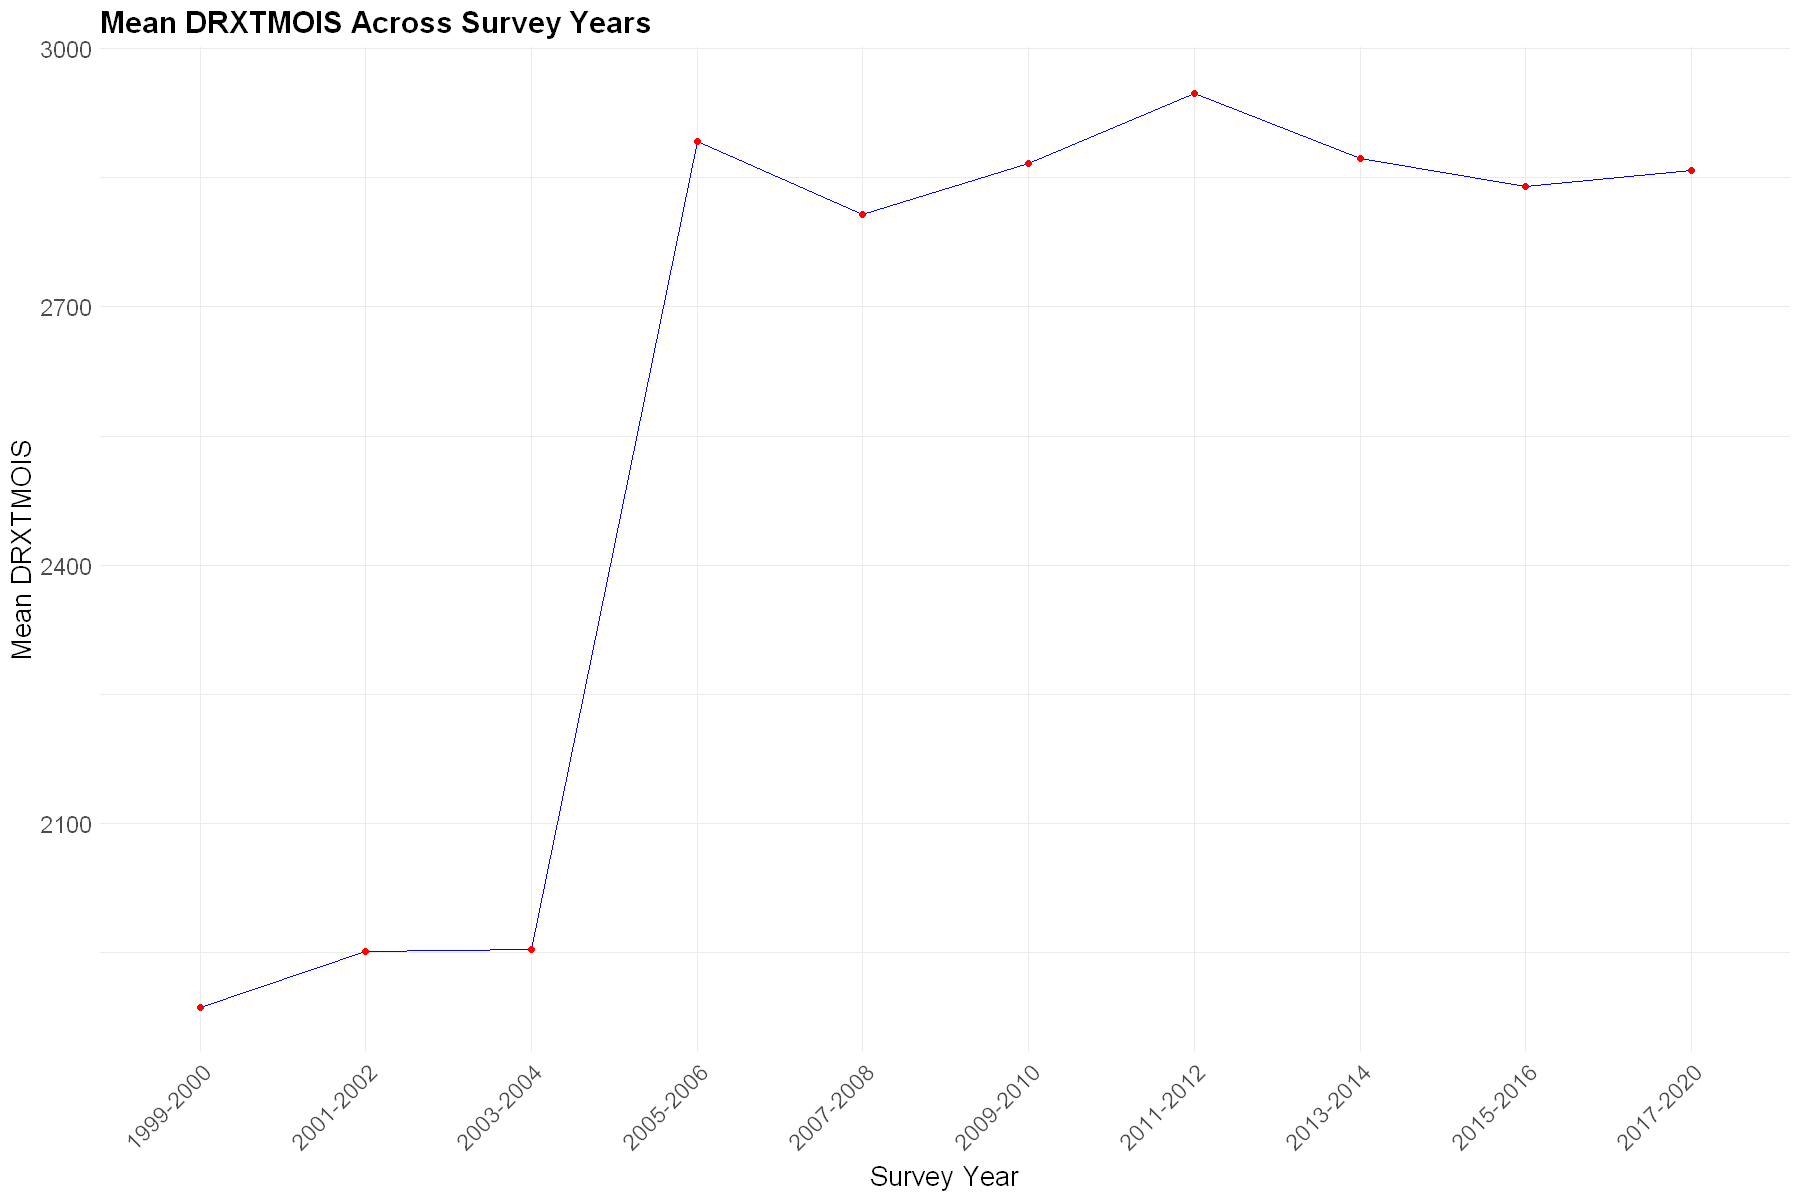

In [35]:
#options(repr.plot.width = 15, repr.plot.height = 10)
#plot_list[["DRXTMOIS"]]

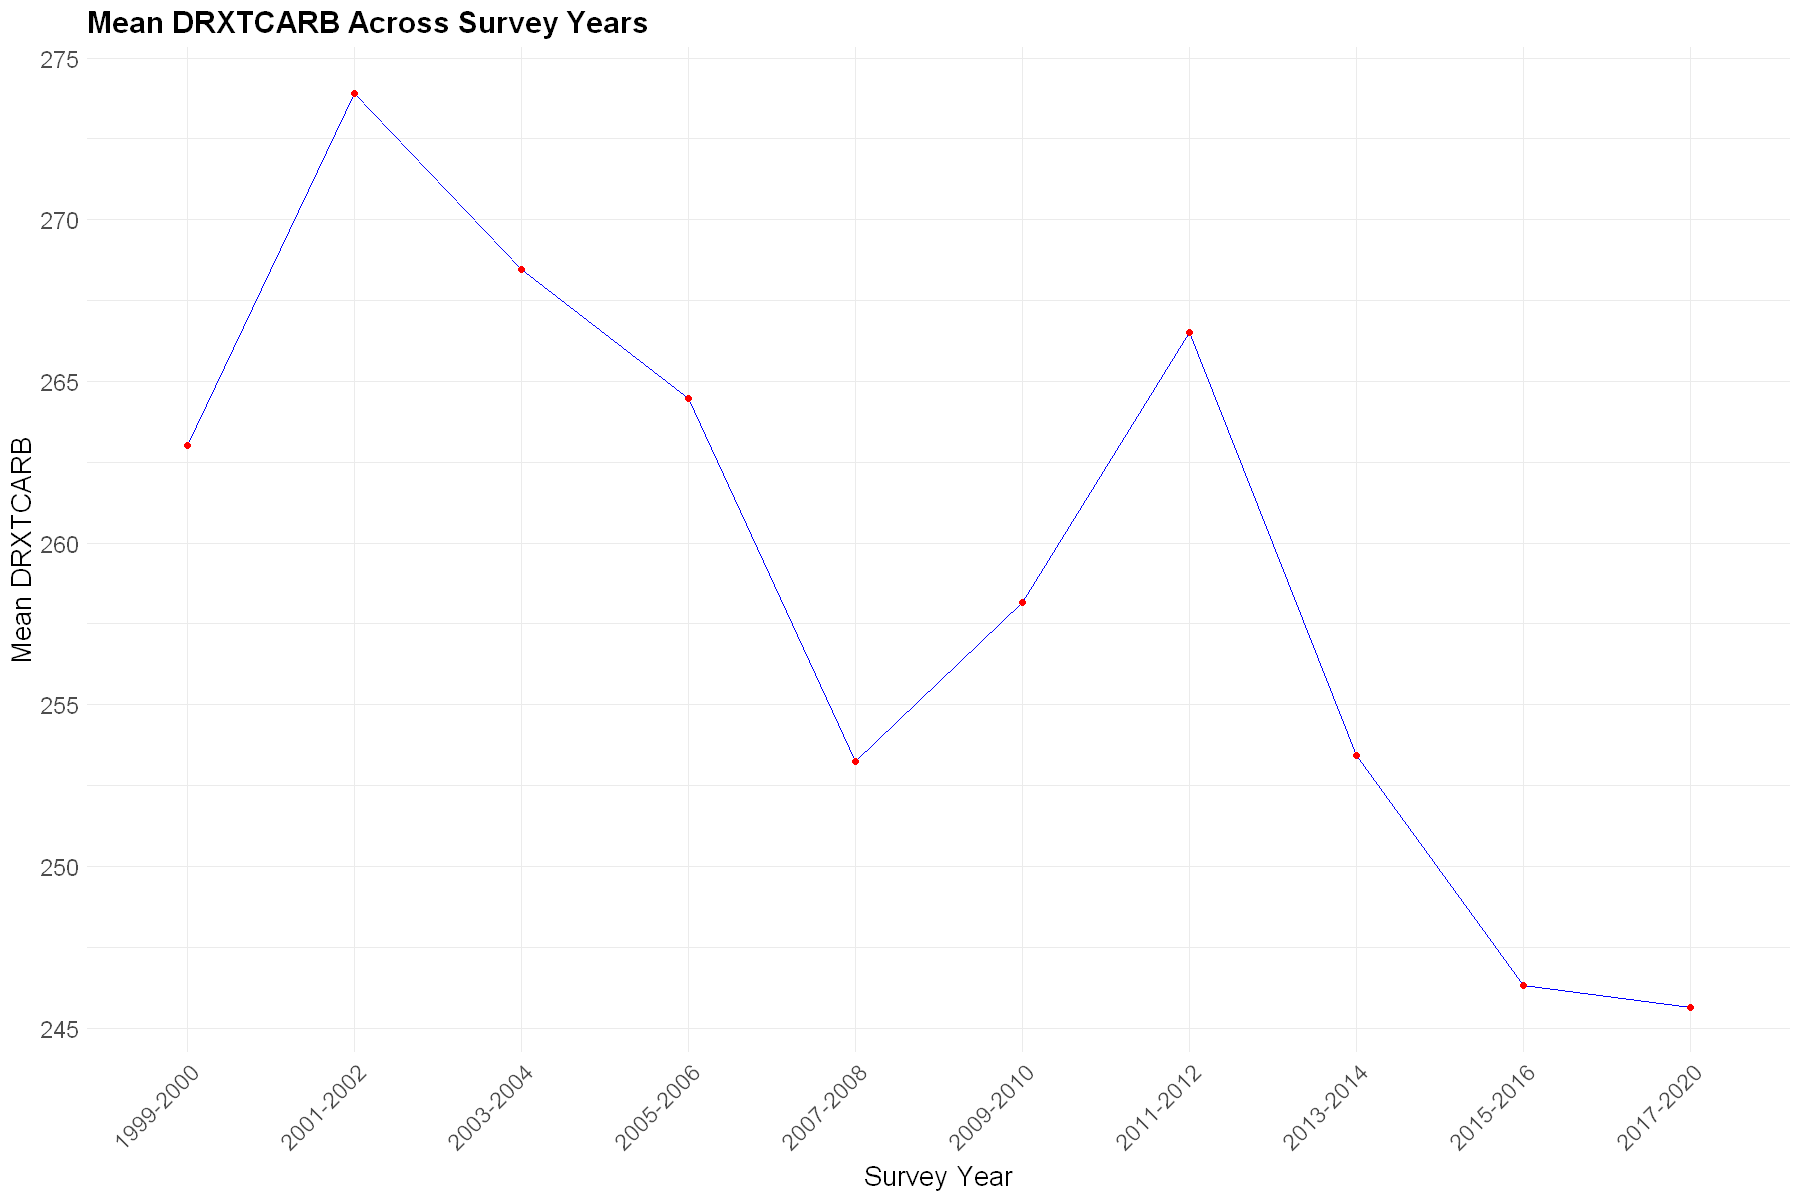

In [36]:
#options(repr.plot.width = 15, repr.plot.height = 10)
#plot_list[["DRXTCARB"]]

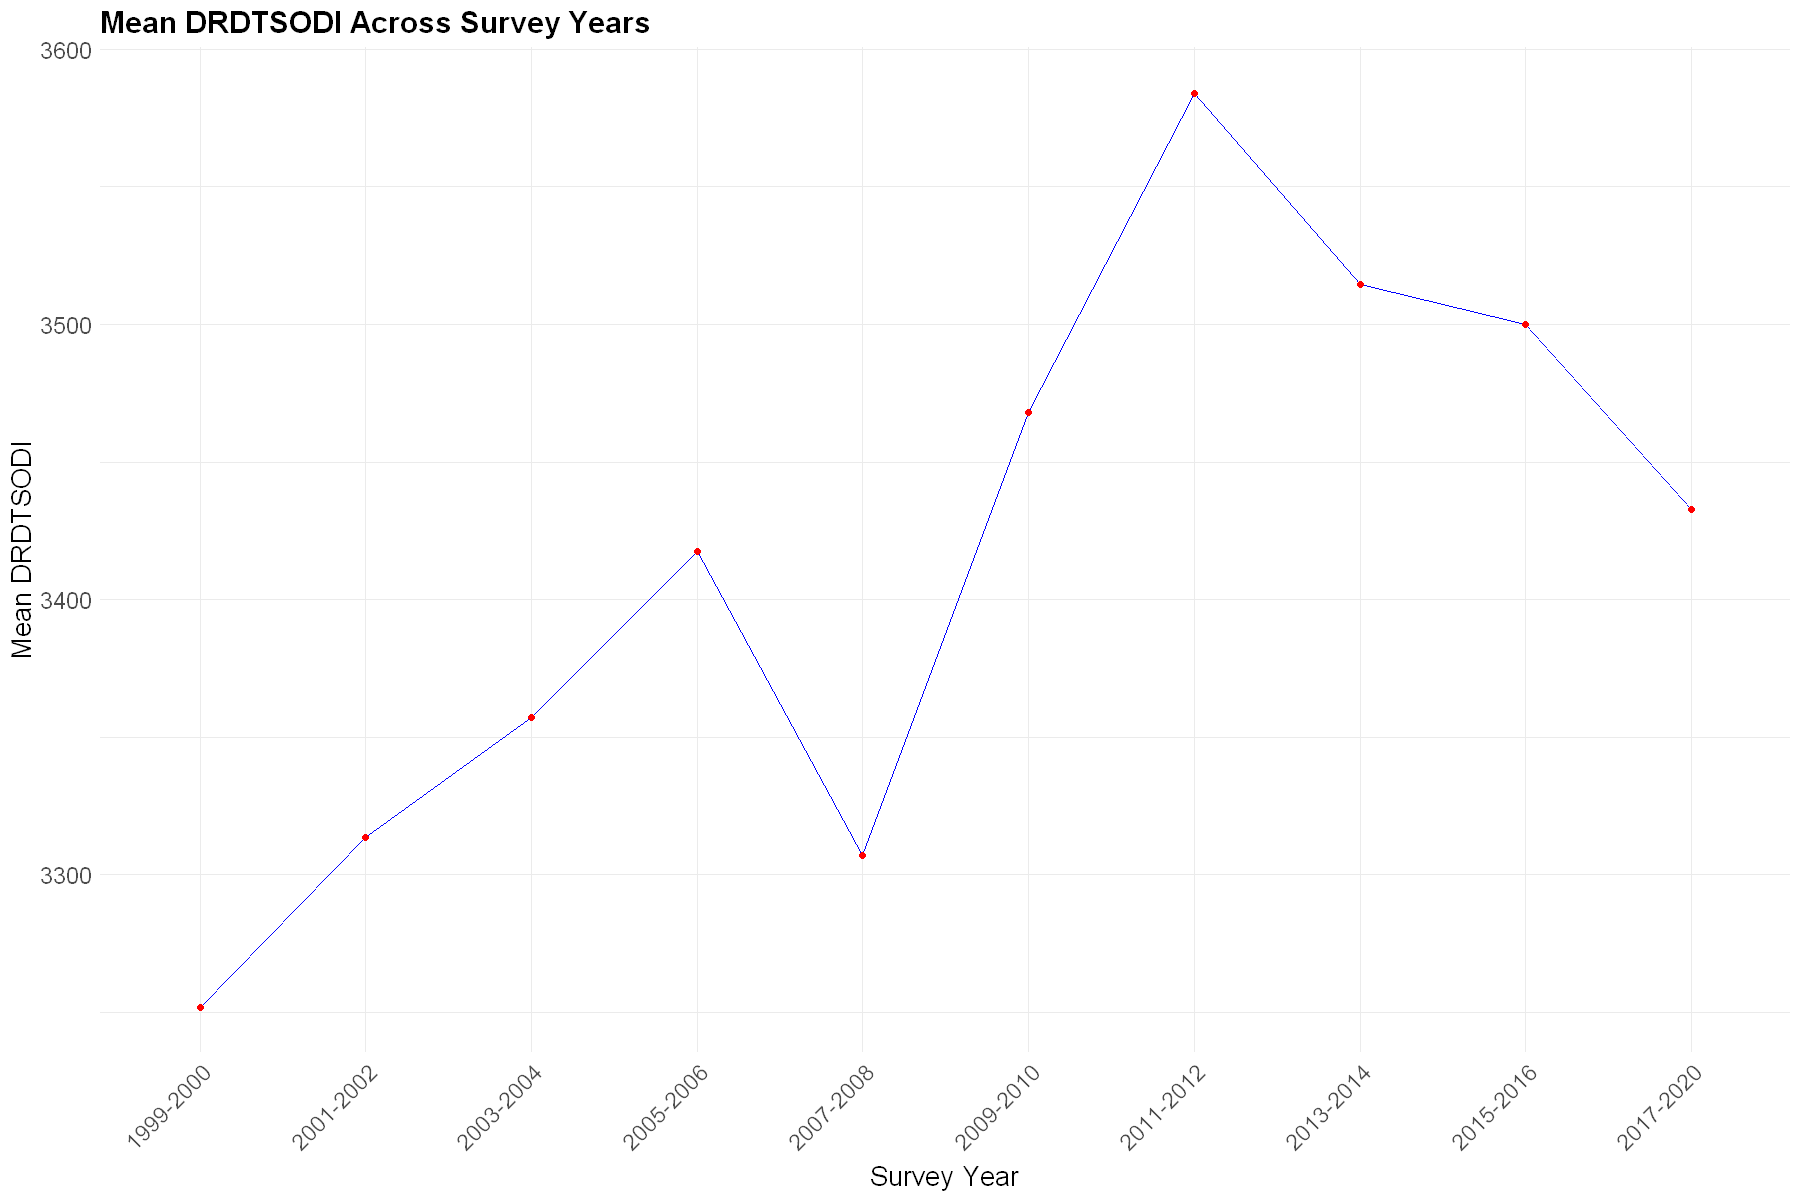

In [37]:
#options(repr.plot.width = 15, repr.plot.height = 10)
#plot_list[["DRDTSODI"]]

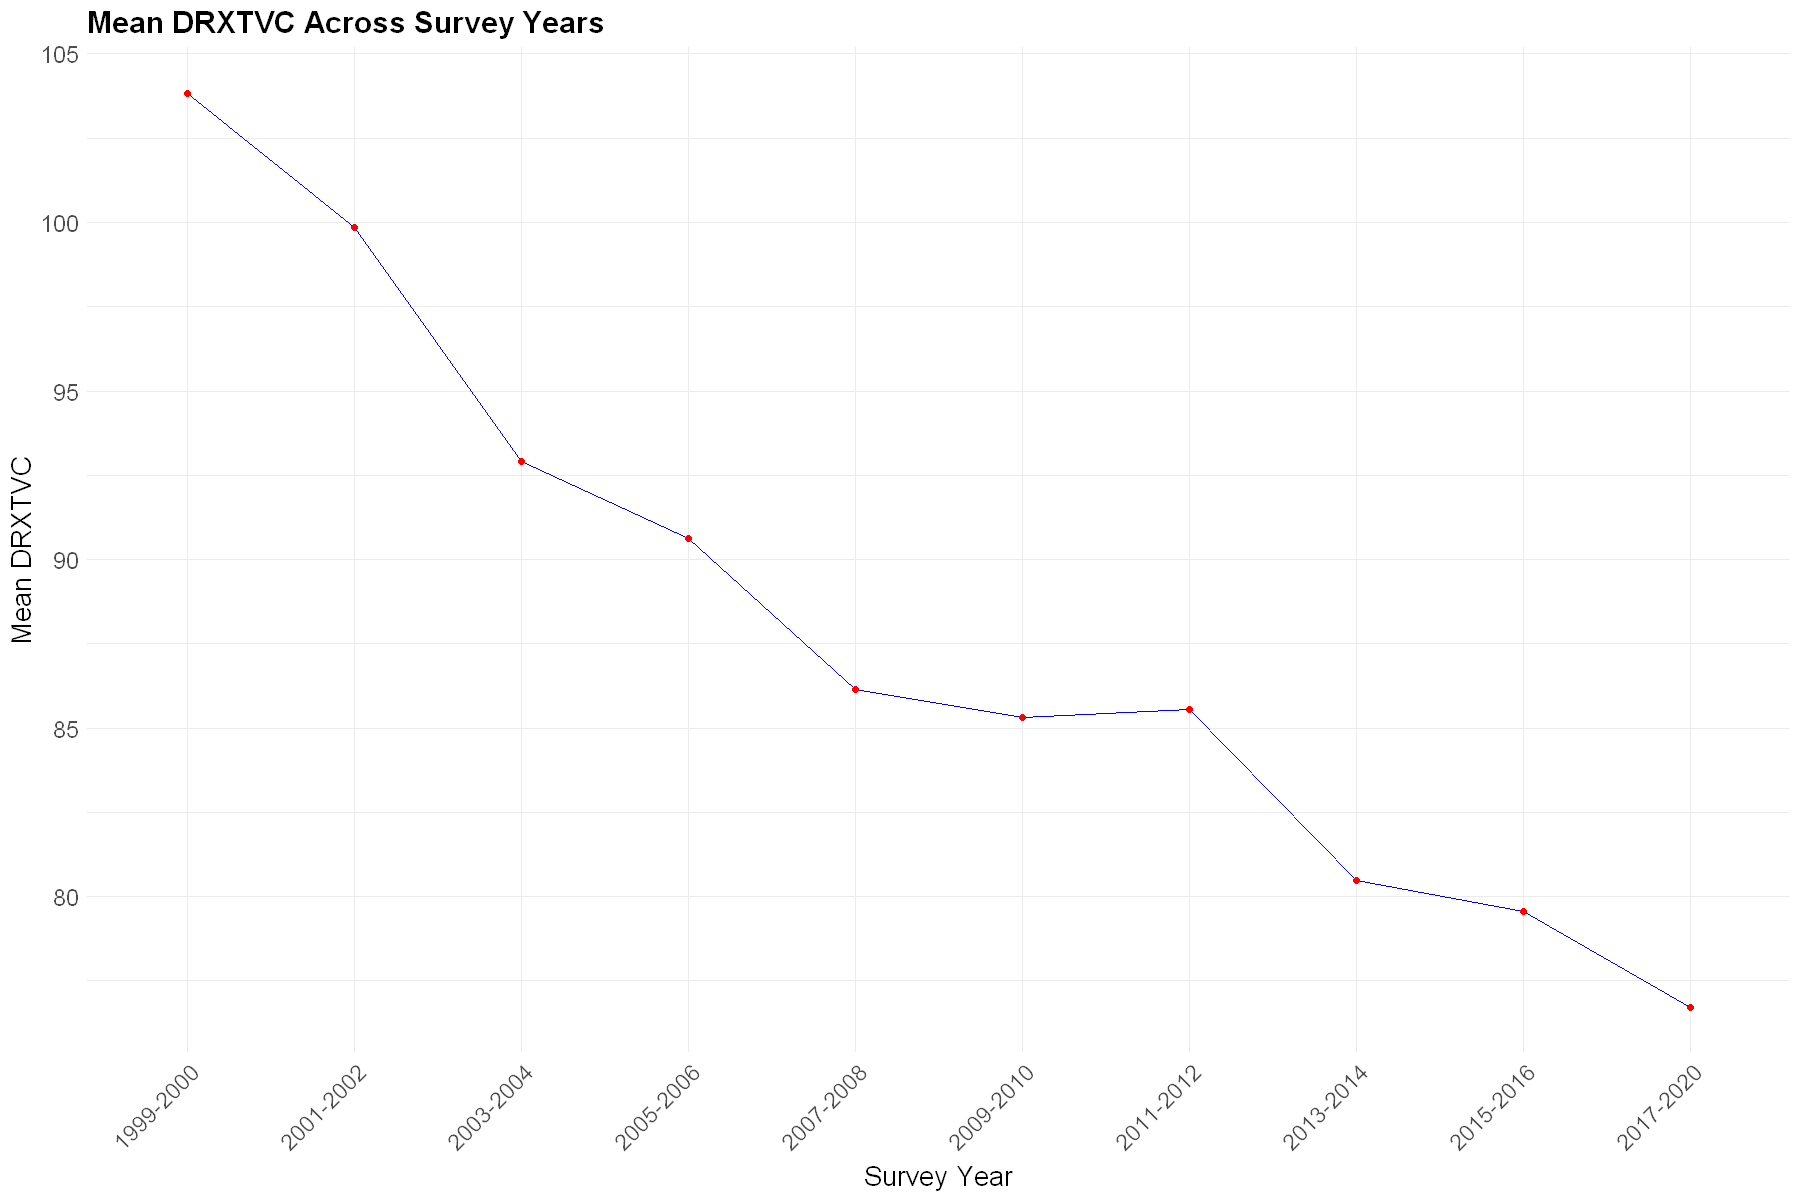

In [38]:
#options(repr.plot.width = 15, repr.plot.height = 10)
#plot_list[["DRXTVC"]]

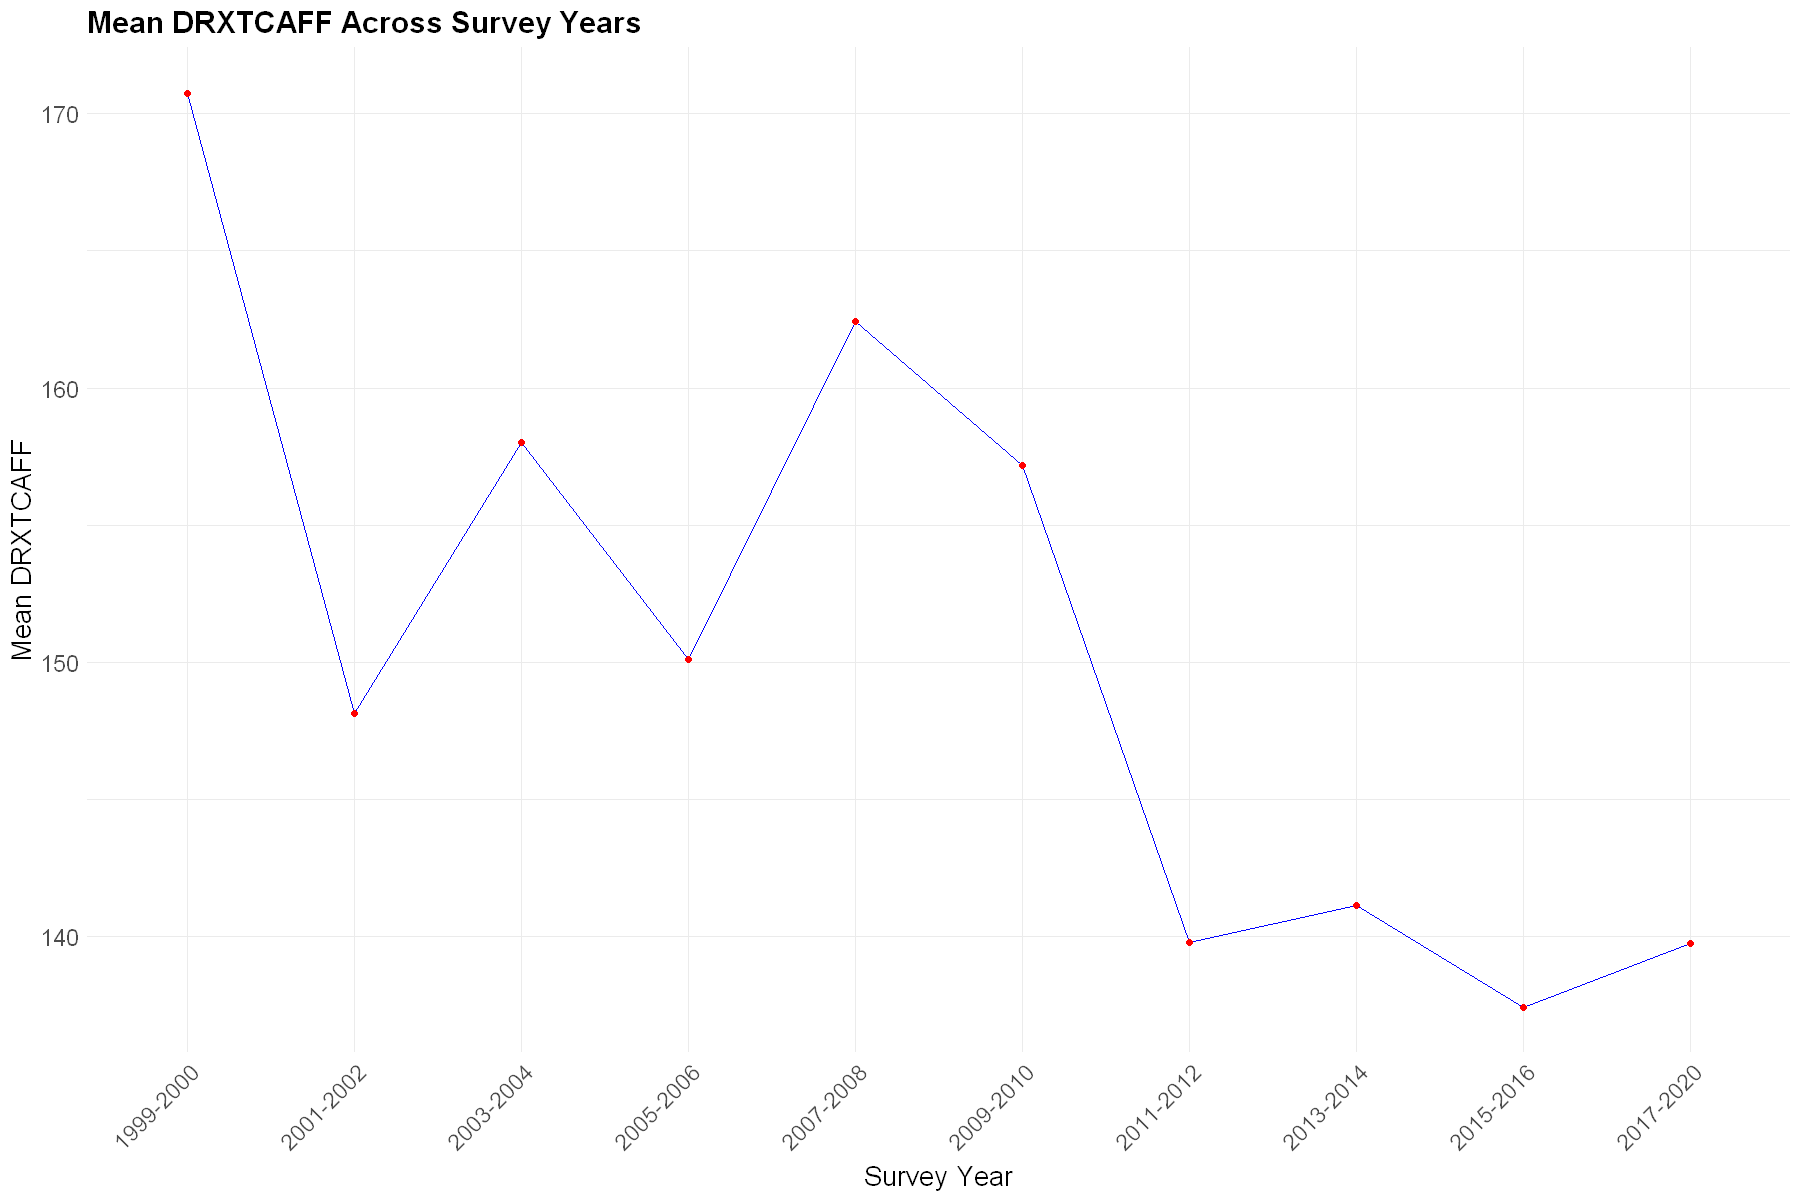

In [39]:
#options(repr.plot.width = 15, repr.plot.height = 10)
#plot_list[["DRXTCAFF"]]

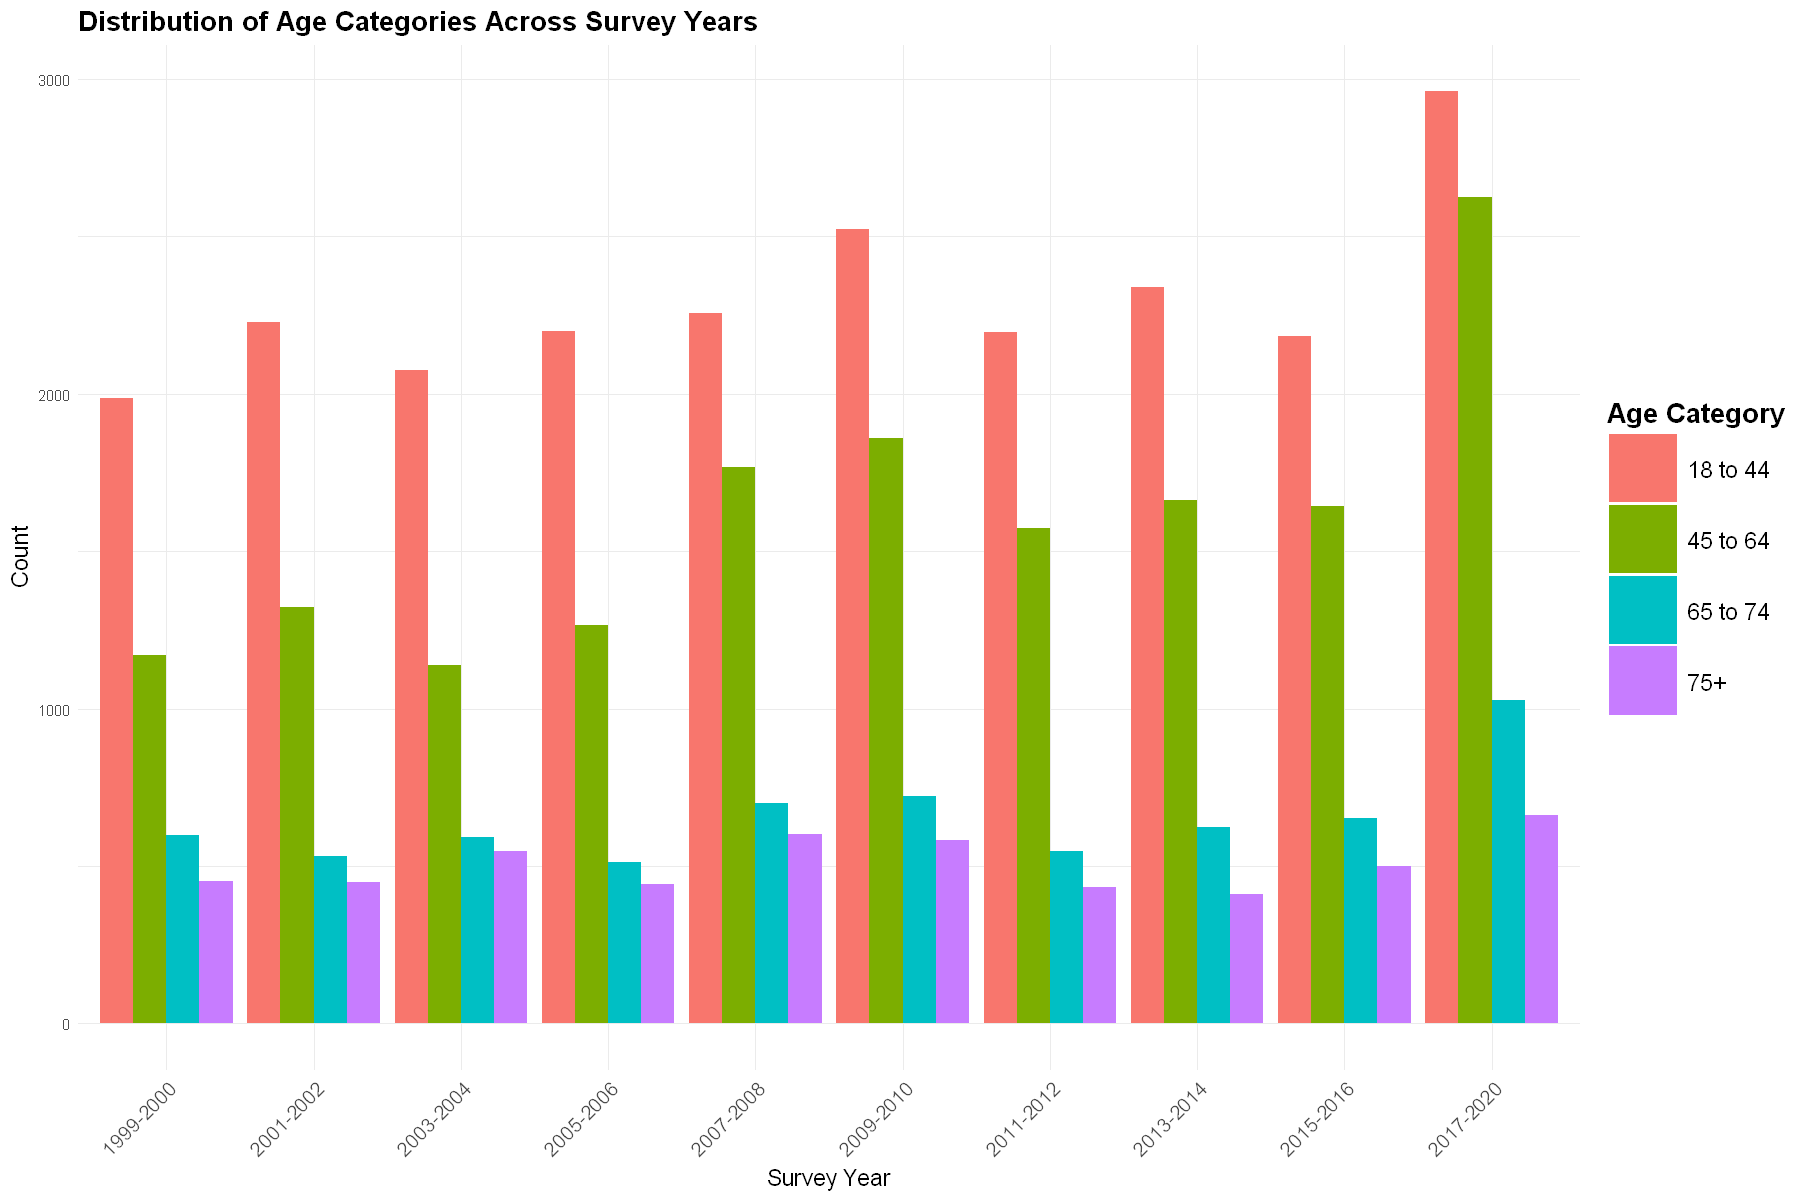

In [32]:
# Load necessary library
#library(ggplot2)
#library(dplyr)

# Define the list of survey years
#survey_years <- c("1999-2000", "2001-2002", "2003-2004", "2005-2006", "2007-2008", 
                  "2009-2010", "2011-2012", "2013-2014", "2015-2016", "2017-2020")

# Initialize an empty data frame to store counts
#age_cat_counts <- data.frame(Survey_Year = character(), demo_age_cat = character(), Count = integer())

# Loop through each survey year and count age categories
#for (year in survey_years) {
#  df <- subsets[[year]]
  
  # Count occurrences of each age category
  #age_counts <- df %>%
    #group_by(demo_age_cat) %>%
    #summarise(Count = n()) %>%
    #mutate(Survey_Year = year)  # Add survey year column
  
  # Append to the main data frame
  #age_cat_counts <- rbind(age_cat_counts, age_counts)
#}

# Convert survey years and categories to factors for proper ordering
#age_cat_counts$Survey_Year <- factor(age_cat_counts$Survey_Year, levels = survey_years)
#age_cat_counts$demo_age_cat <- factor(age_cat_counts$demo_age_cat, 
#                                      levels = c("18 to 44", "45 to 64", "65 to 74", "75+"))

# Create grouped bar plot
#p <- ggplot(age_cat_counts, aes(x = Survey_Year, y = Count, fill = demo_age_cat)) +
#  geom_bar(stat = "identity", position = "dodge") +  # Grouped bars
#  labs(title = "Distribution of Age Categories Across Survey Years",
#       x = "Survey Year", 
#       y = "Count",
#       fill = "Age Category") +
#  theme_minimal() +
#  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 12),  # Rotate x-axis labels
#        axis.title.x = element_text(size = 14),
#        axis.title.y = element_text(size = 14),
#        plot.title = element_text(size = 16, face = "bold"),
#        legend.text = element_text(size = 14),
#        legend.title = element_text(size = 16, face = "bold"),
#        legend.key.size = unit(1.5, "cm"))

# Print the plot
#print(p)
